<a href="https://colab.research.google.com/github/ross13elder/ross13elder.github.io/blob/main/INNHotels_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    ConfusionMatrixDisplay,
)

In [ ]:
# Mounting Google Drive to the notebook
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_INNhotels = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Supervised Learning - Classifications/Project/INNHotelsGroup.csv")

In [ ]:
# copying data to another variable to avoid any changes to original data
data = df_INNhotels

## Data Overview

### View the first 5 rows and last 5 rows

In [ ]:
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
data.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

### Understand shape of dataset

In [ ]:
data.shape

(36275, 19)

- There are 36275 rows (bookings) and 19 columns

###Check data types of columns for dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

- There are 14 numeric (float and int type) and 5 string (object type) columns in the data set
- booking_status is the dependent variable which is of an object type

###Checking missing values and duplicate values

In [ ]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

- There are no null values in the data set

In [ ]:
data.duplicated().sum()

0

- There are no duplicate entries in the data set

###Removing Booking_ID column

In [ ]:
data.Booking_ID.nunique()

36275

- The Booking_ID column contains only unique values, so we may drop this column

In [ ]:
data = data.drop(['Booking_ID'], axis=1)

In [ ]:
# checking to make sure it dropped the column
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

###Statistical Summary

In [ ]:
data.describe(include='all').T

count unique           top   freq  \
no_of_adults                         36275.00000    NaN           NaN    NaN   
no_of_children                       36275.00000    NaN           NaN    NaN   
no_of_weekend_nights                 36275.00000    NaN           NaN    NaN   
no_of_week_nights                    36275.00000    NaN           NaN    NaN   
type_of_meal_plan                          36275      4   Meal Plan 1  27835   
required_car_parking_space           36275.00000    NaN           NaN    NaN   
room_type_reserved                         36275      7   Room_Type 1  28130   
lead_time                            36275.00000    NaN           NaN    NaN   
arrival_year                         36275.00000    NaN           NaN    NaN   
arrival_month                        36275.00000    NaN           NaN    NaN   
arrival_date                         36275.00000    NaN           NaN    NaN   
market_segment_type                        36275      5        Online  23214   
repeated_guest                       36275.00000    NaN           NaN    NaN   
no_of_previous_cancellations         36275.00000    NaN           NaN    NaN   
no_of_previous_bookings_not_canceled 36275.00000    NaN           NaN    NaN   
avg_price_per_room                   36275.00000    NaN           NaN    NaN   
no_of_special_requests               36275.00000    NaN           NaN    NaN   
booking_status                             36275      2  Not_Canceled  24390   

                                           mean      std        min  \
no_of_adults                            1.84496  0.51871    0.00000   
no_of_children                          0.10528  0.40265    0.00000   
no_of_weekend_nights                    0.81072  0.87064    0.00000   
no_of_week_nights                       2.20430  1.41090    0.00000   
type_of_meal_plan                           NaN      NaN        NaN   
required_car_parking_space              0.03099  0.17328    0.00000   
room_type_reserved                          NaN      NaN        NaN   
lead_time                              85.23256 85.93082    0.00000   
arrival_year                         2017.82043  0.38384 2017.00000   
arrival_month                           7.42365  3.06989    1.00000   
arrival_date                           15.59700  8.74045    1.00000   
market_segment_type                         NaN      NaN        NaN   
repeated_guest                          0.02564  0.15805    0.00000   
no_of_previous_cancellations            0.02335  0.36833    0.00000   
no_of_previous_bookings_not_canceled    0.15341  1.75417    0.00000   
avg_price_per_room                    103.42354 35.08942    0.00000   
no_of_special_requests                  0.61966  0.78624    0.00000   
booking_status                              NaN      NaN        NaN   

                                            25%        50%        75%  \
no_of_adults                            2.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    1.00000    2.00000   
no_of_week_nights                       1.00000    2.00000    3.00000   
type_of_meal_plan                           NaN        NaN        NaN   
required_car_parking_space              0.00000    0.00000    0.00000   
room_type_reserved                          NaN        NaN        NaN   
lead_time                              17.00000   57.00000  126.00000   
arrival_year                         2018.00000 2018.00000 2018.00000   
arrival_month                           5.00000    8.00000   10.00000   
arrival_date                            8.00000   16.00000   23.00000   
market_segment_type                         NaN        NaN        NaN   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_

- Appears the approx. average booking is with 2 adults and no children
- Median for stay is: weekend stay is a singular night, and weekday stay is 2 nights
- Most prefer to at least have breakfast when staying
- Most do not need a cover parking space
- The mean number of days between booking and arrival date is approx. 85 days
- Most book online for their stay
- Average price per room is approx. €103
- Most do not cancel their booking

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

####Functions to help with Univariate Analysis

In [ ]:
# function to create histogram and boxplot on same scale

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

###Univariate Analysis

####Observations on number of Adults

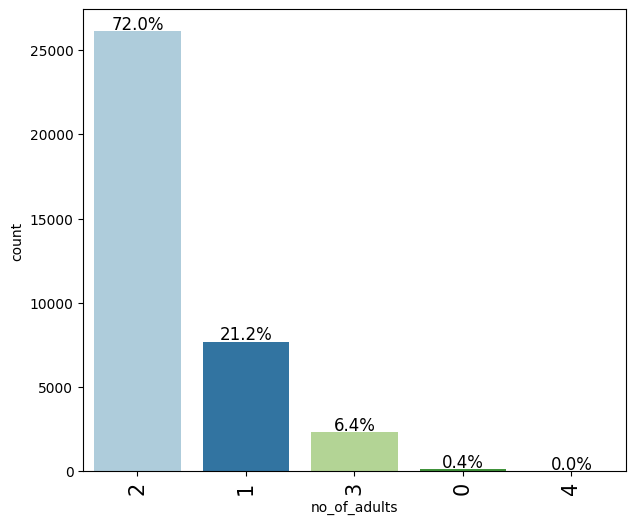

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

In [ ]:
labeled_barplot(data, 'no_of_adults', perc=True)
data['no_of_adults'].value_counts()

- 2 Adults stay per booking ~72% of the time, and with 1 the next highest(21%)
- 4 adults rarely happens

####Observations on number of Children

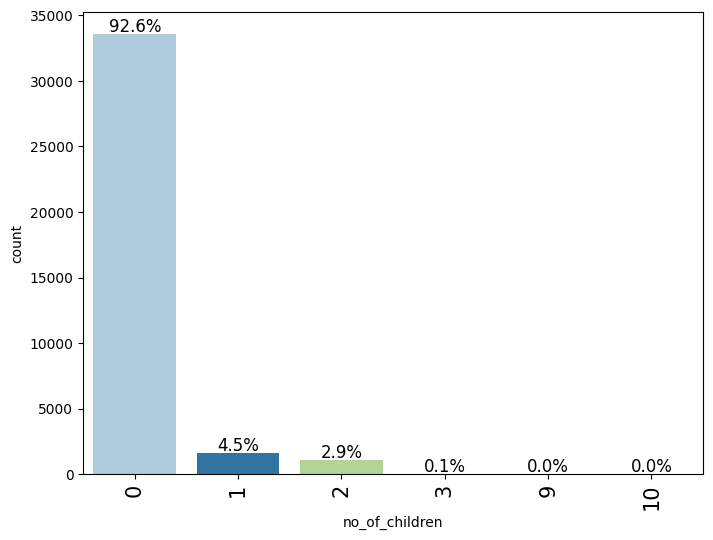

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

In [ ]:
labeled_barplot(data, 'no_of_children', perc=True)
data['no_of_children'].value_counts()

- Number of children that stay is right skewed, with most stays having no children (92%)
- There are only 3 instances where there is more than 3 children, which are 9 and 10.  These values are drastically different, so we will replace the 9 and 10 with 3

In [ ]:
data['no_of_children'] = data['no_of_children'].replace([9,10],3)

#Checking to make sure it rplaced correctly
data['no_of_children'].value_counts()

0    33577
1     1618
2     1058
3       22
Name: no_of_children, dtype: int64

####Observation on Total guests

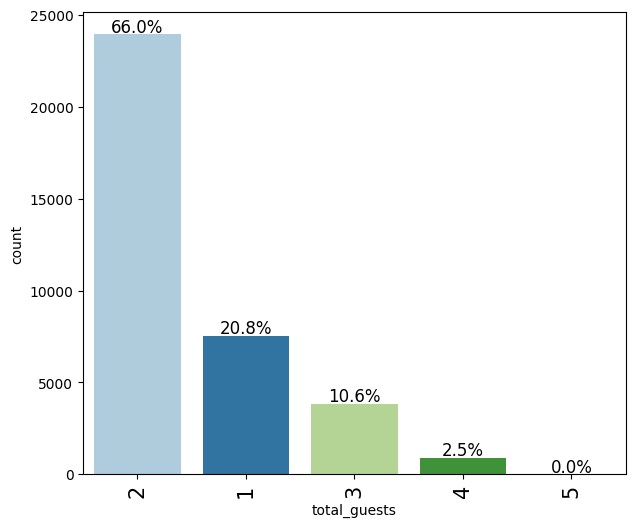

2    23942
1     7552
3     3851
4      913
5       17
Name: total_guests, dtype: int64

In [ ]:
# Create a column for total guests
data['total_guests'] = data['no_of_adults'] + data['no_of_children']

labeled_barplot(data, 'total_guests', perc=True)
data['total_guests'].value_counts()

- Most stays have 2 guests
- Maximum 5, which is less than 1%

####Observations on number of Weekend Nights

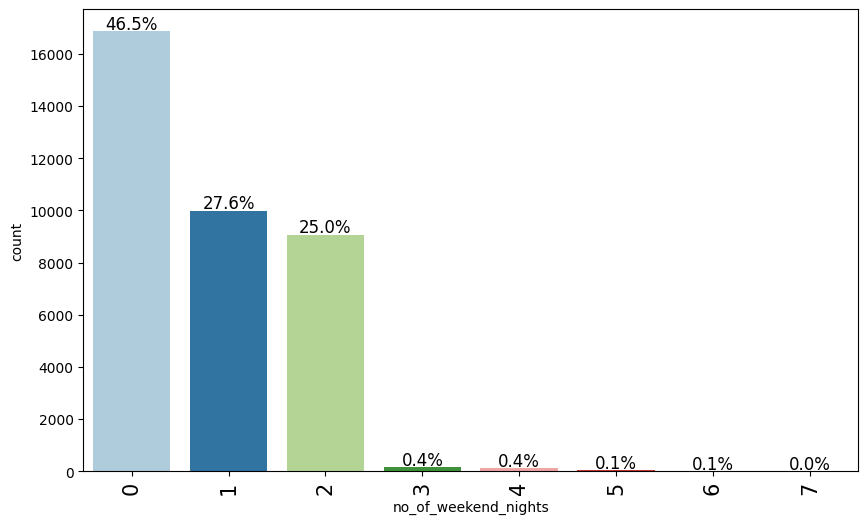

0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64

In [ ]:
labeled_barplot(data, 'no_of_weekend_nights', perc=True)
data['no_of_weekend_nights'].value_counts()

- Number of Weekend night stays is right skewed
- most stay zero weekend nights (46.5%)
- minimum of 0 and max of 7
- there is only one instance of 7 weekend night stays, but we will keep it since isn't far from other values

####Observations on Number of Week Night stays

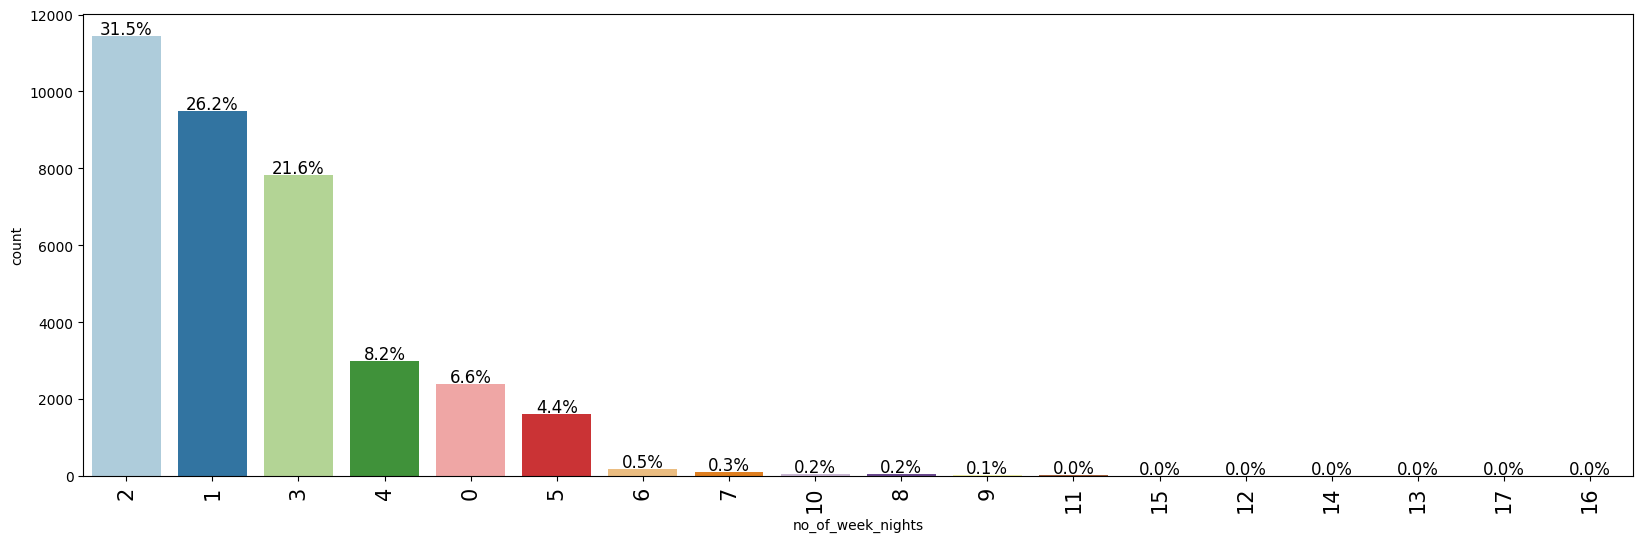

2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64

In [ ]:
labeled_barplot(data, 'no_of_week_nights', perc=True)
data['no_of_week_nights'].value_counts()

- Most number of week night stays is 2, followed by 1 and 3
- minimum of zero and max of 17
- There are several high outliers, but these days seem very feasible and inline with the data

####Observations on Total Number of Night stays

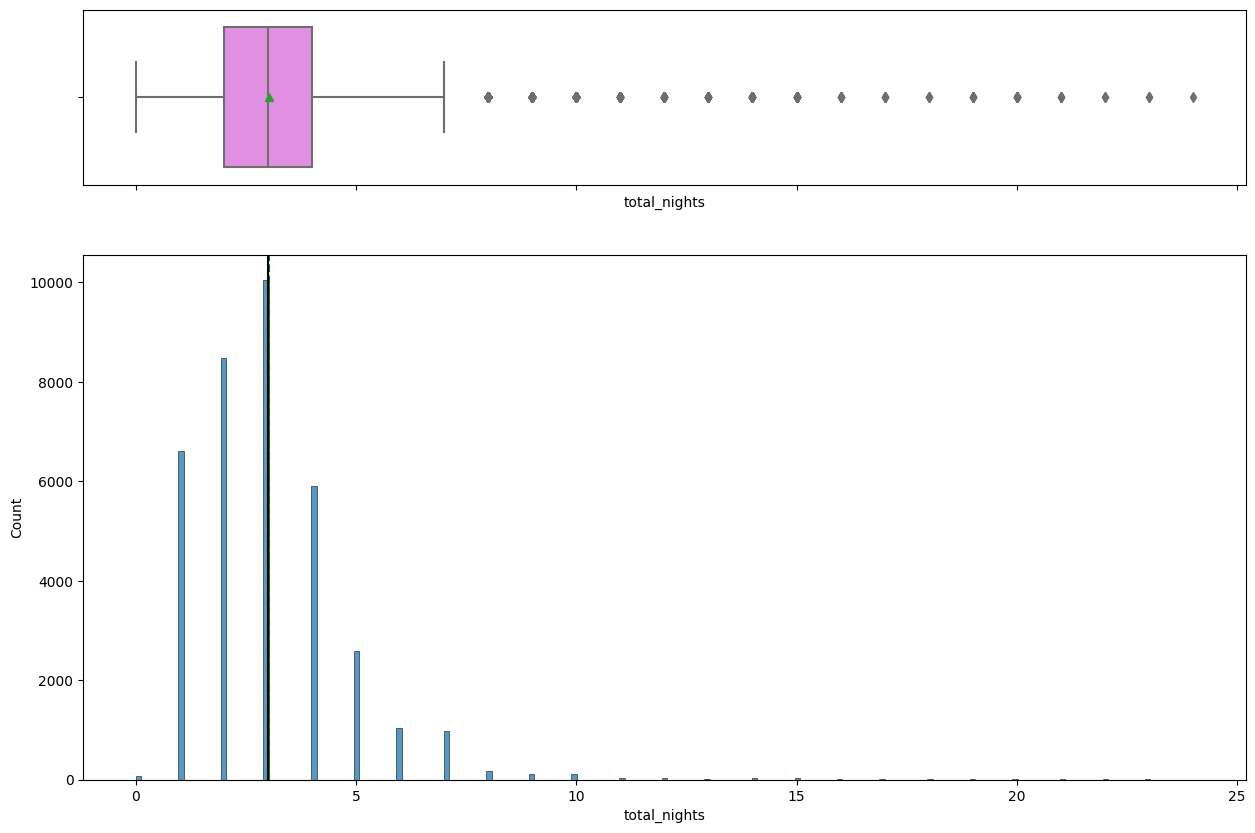

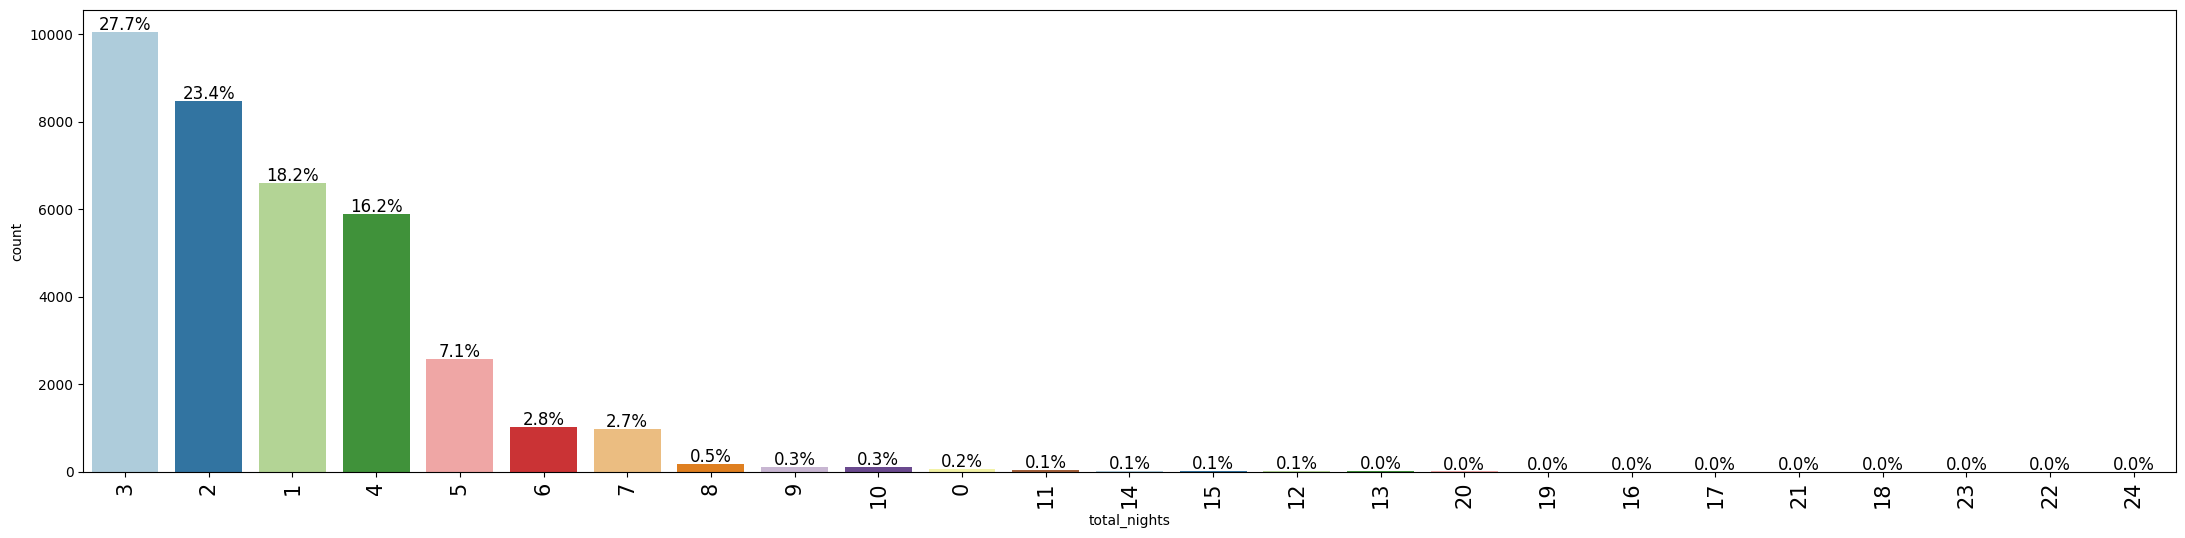

In [ ]:
#Creating column for Total Nights
data['total_nights']= data['no_of_weekend_nights'] + data['no_of_week_nights']

histogram_boxplot(data,'total_nights')
labeled_barplot(data, 'total_nights', perc=True)

- Number of total night stays is right skewed with a median of 3, with several high outliers
- minimum of zero and max of 24
- It is interesting you can book a stay for zero nights, (~.2% of bookings)

In [ ]:
#Checking for how many zero night stays are present
zero = data['total_nights'].value_counts()[0]
print('Number of bookings with zero night stays is',zero)

Number of bookings with zero night stays is 78


In [ ]:
#Percent of nights booked 3 or less
nights = data['total_nights'][lambda x: x<=3].count()
print('Percent of Nights 3 or less is',nights/36275)

Percent of Nights 3 or less is 0.6948587181254308


####Observations on Type of Meal Plan selected

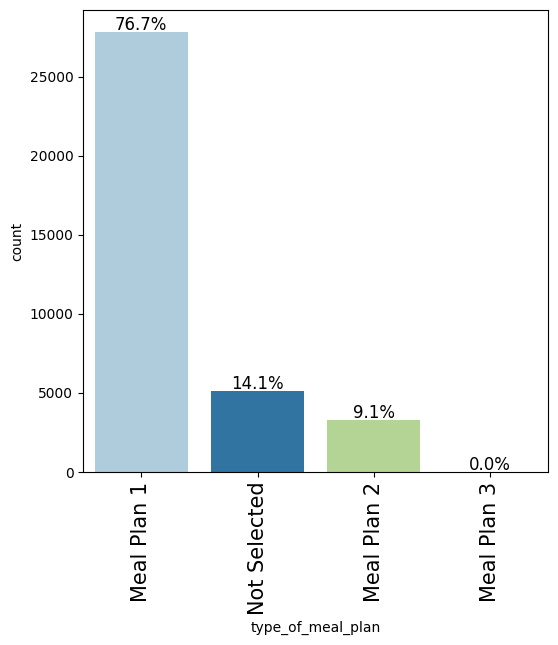

In [ ]:
labeled_barplot(data, 'type_of_meal_plan', perc=True)

- Majority of customers selected Meal Plan 1 (breakfast only), followed by none, meal plan 2, and then plan 3
- Meal plan 3 was only ordered by 5 customers, making this be far less than 1%

####Observations on Required Car Parking Space

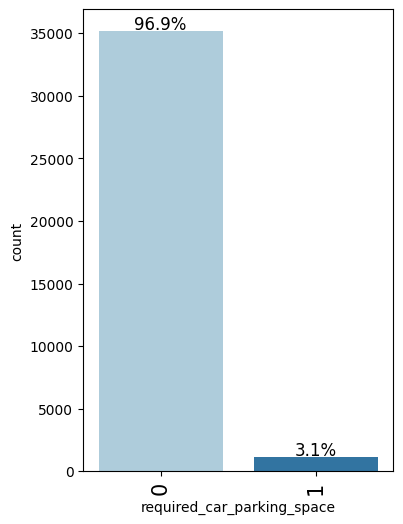

In [ ]:
labeled_barplot(data, 'required_car_parking_space', perc=True)

- ~97% of customers do not require a parking space

####Observations on Room Type Reserved

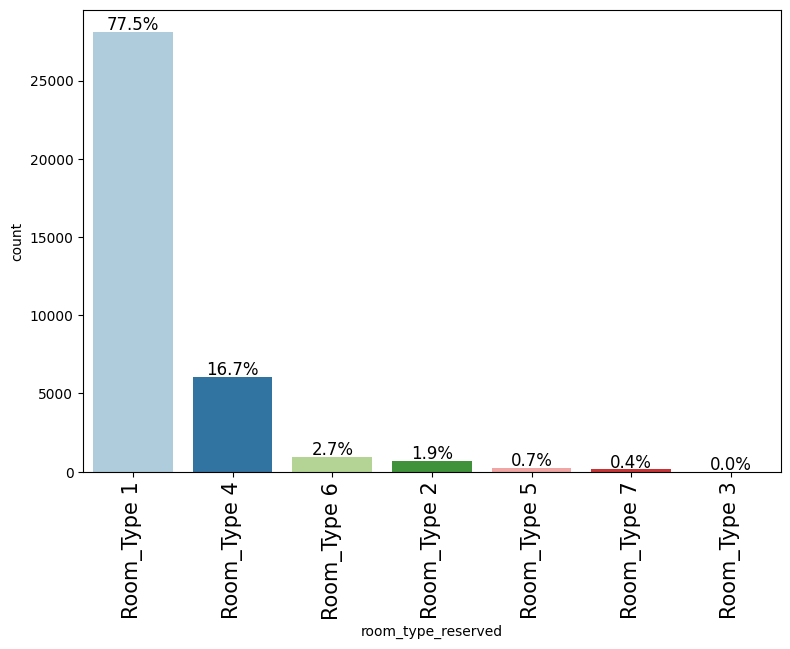

In [ ]:
labeled_barplot(data,'room_type_reserved',perc=True)

- Room Type 1 was selected the majority of the time (~77%), followed by room type 4.
- Type 5, 7, and 3 were selected less than 1% of the time

####Observations on Lead Time

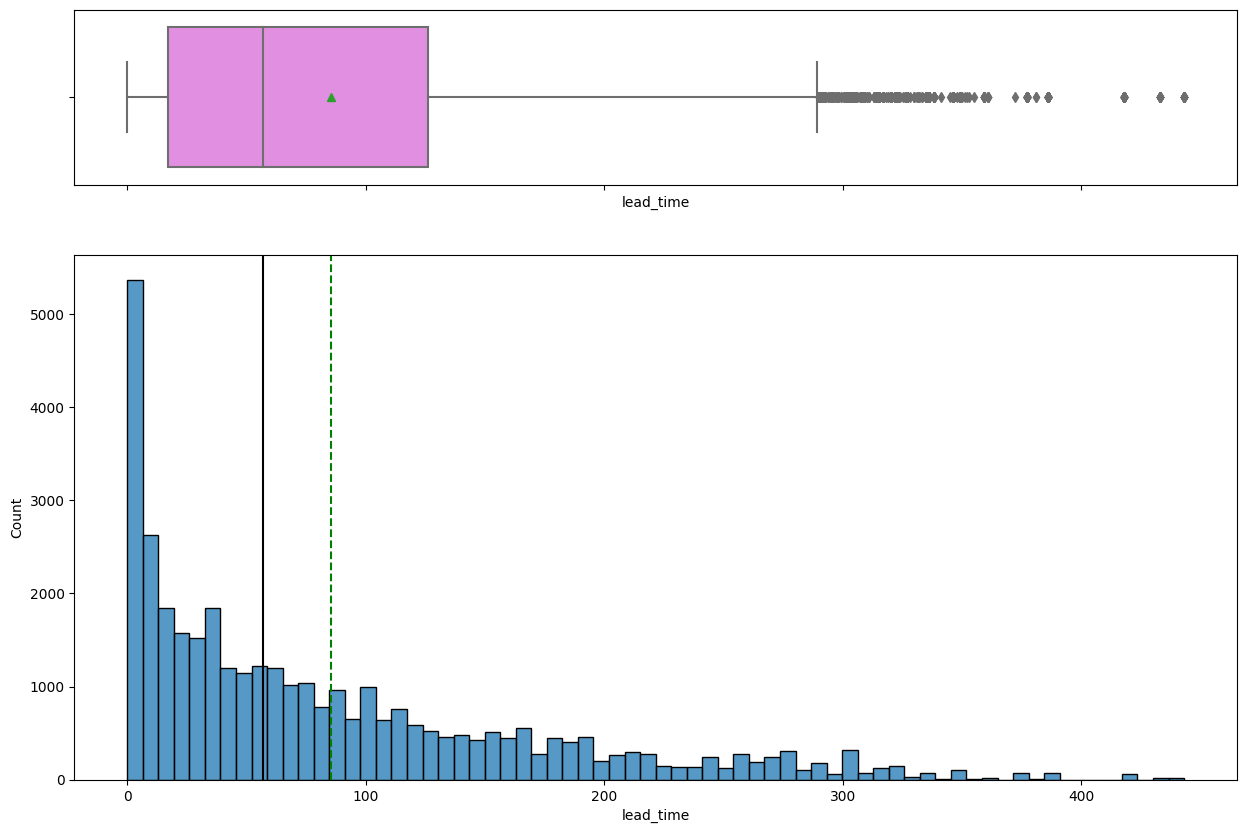

In [ ]:
histogram_boxplot(data, 'lead_time')

- Lead Time is right skewed with a median about 2 months (~57 days), with a range of ~443 days, with several high outliers

In [ ]:
#lead time less than 60 days
days = data['lead_time'][lambda x: x<60].count()
print('Percent of Lead Time less than 60 days is',days/36275)

Percent of Lead Time less than 60 days is 0.5108201240523776


In [ ]:
#lead time less than 30 days
days = data['lead_time'][lambda x: x<30].count()
print('Percent of Lead Time less than 30 days is',days/36275)

Percent of Lead Time less than 30 days is 0.33499655410062024


####Observations on Arrival Year

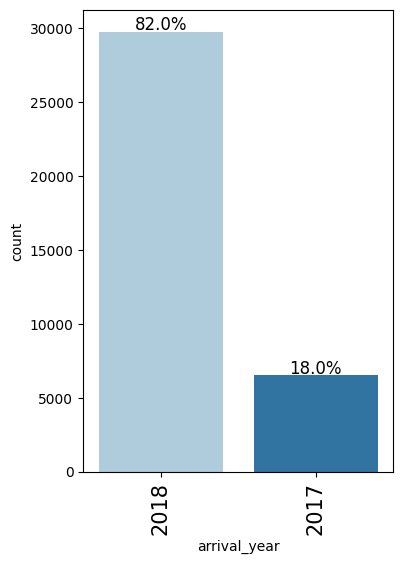

In [ ]:
labeled_barplot(data,'arrival_year', perc=True)

- Majority of bookings occured in 2018 (~82%)

####Observations on Arrival Month

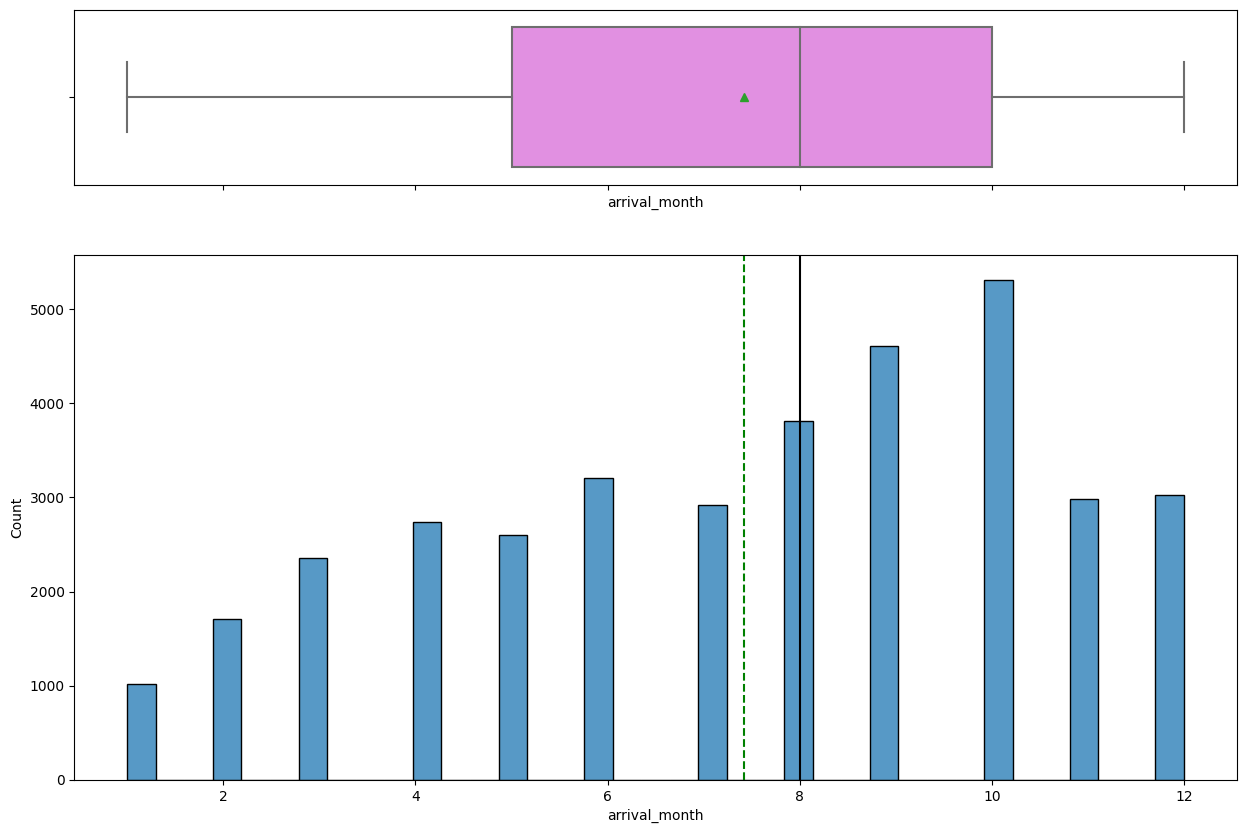

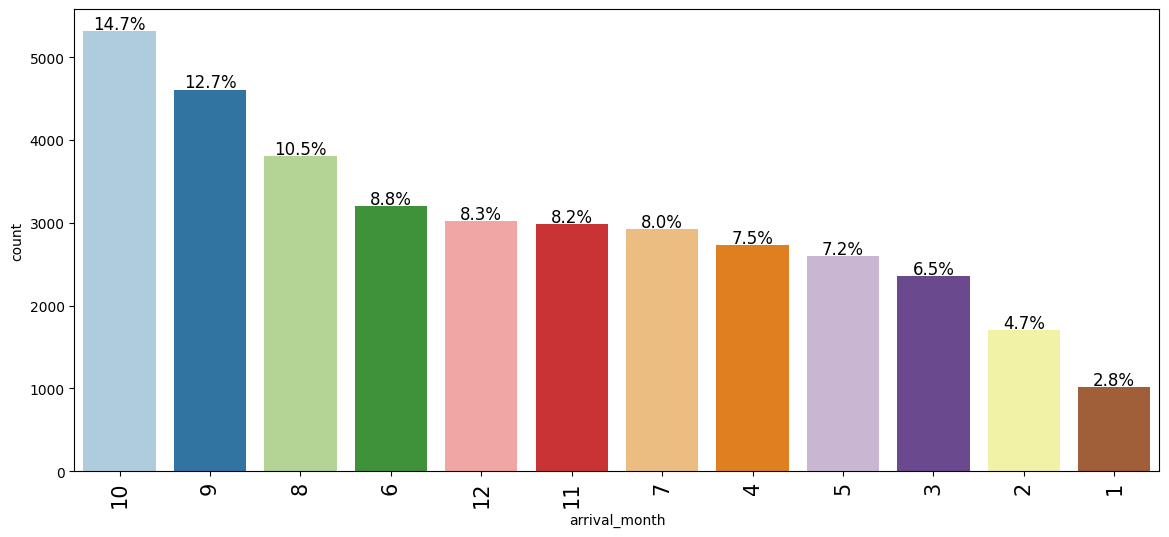

In [ ]:
histogram_boxplot(data,'arrival_month')
labeled_barplot(data,'arrival_month', perc=True)

- It is a left skewed distribution meaning more bookings occured in the later part of the year.
- Highest month of stay was October, followed by September and August
- Lowest month was January

Question 1 - Answered
- The busiest months in the hotel are October, September, and August.  This makes up ~38% of bookings

####Observations on Arrival Date

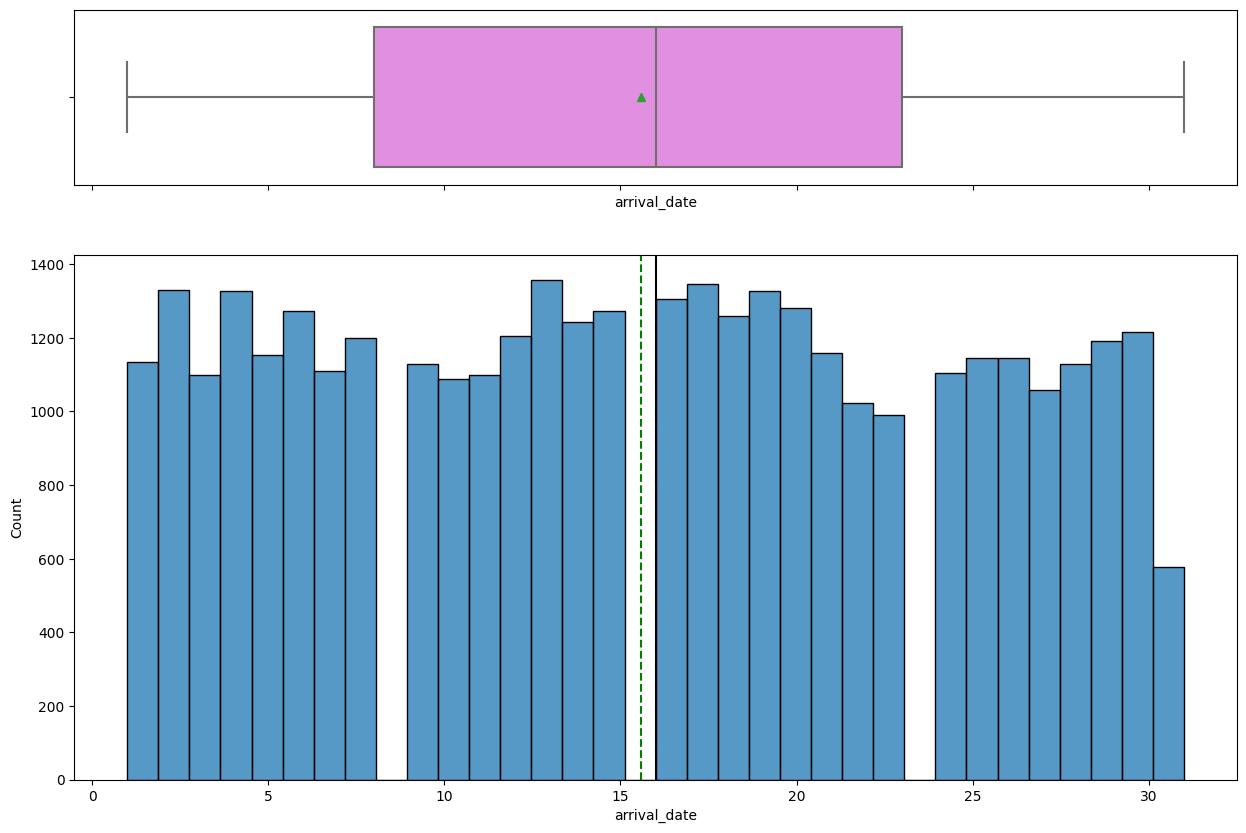

In [ ]:
histogram_boxplot(data, 'arrival_date')

- It is almost a uniform distribution for the day of the stay.  There is slightly less toward the end of the month but this could because not all months have 31 days.

####Observations on Market Segment Type

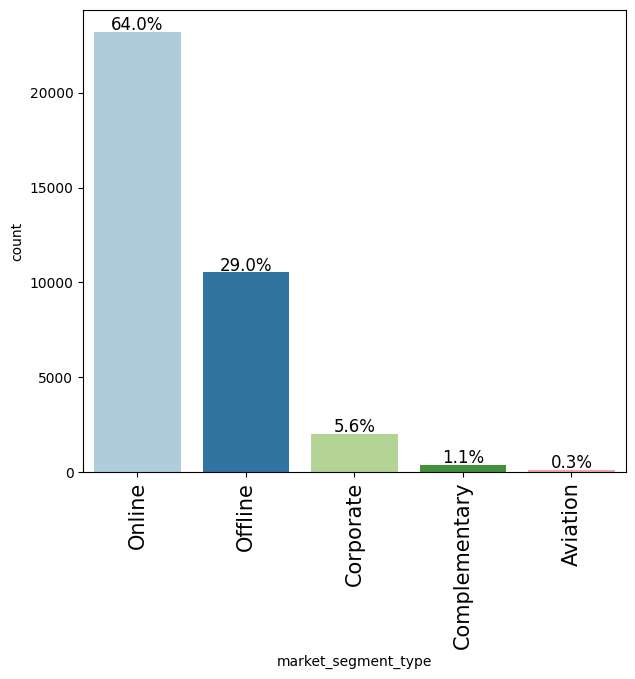

In [ ]:
labeled_barplot(data, 'market_segment_type', perc=True)

- Most bookings are made online (~64%), followed by offline, and coorporate
- Complementary make up about 1% of the bookings
- Aviation is less than 1% of the bookings

Question 2 - Answered
- Most guests book from an online platform

####Observations on Repeated Guests

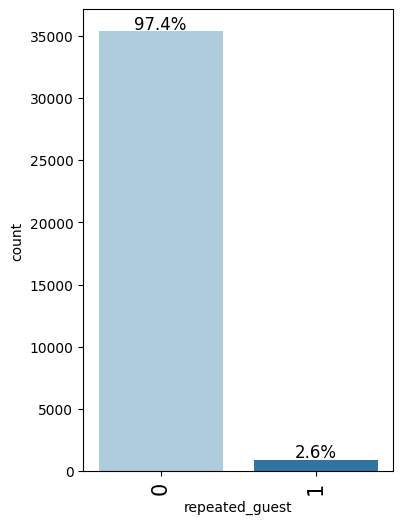

In [ ]:
labeled_barplot(data,'repeated_guest', perc=True)

- More than 97% of guests are not repeat customers
- Repeat customers make up less than 3% of reservations
- This is something the Hotel wants to look into.  Repeat guests show that it was a good experience, and good image for the hotel.

####Observations on Number of Previous Cancellations

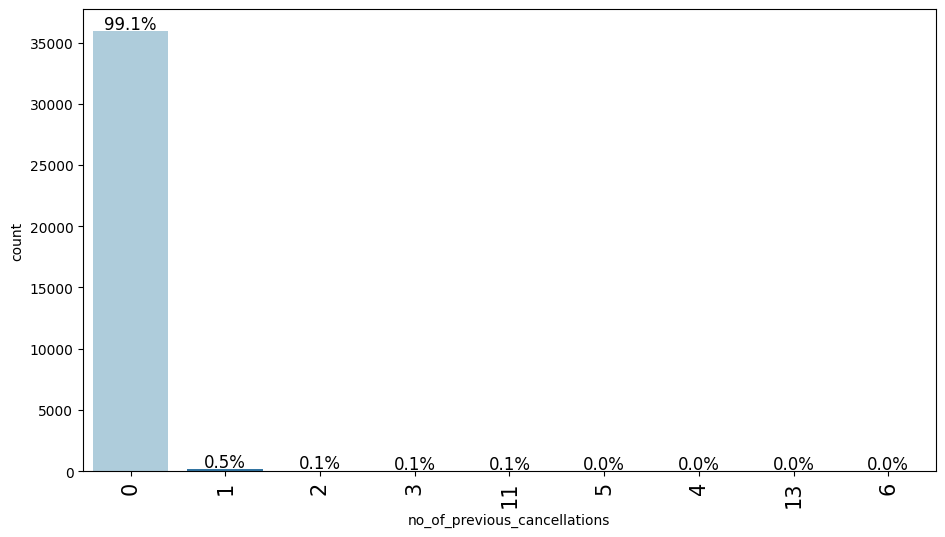

In [ ]:
labeled_barplot(data,'no_of_previous_cancellations', perc=True)

- Distribution is heavily right skewed, a range of 13, and with everything considered an outliter past 0
-  majority (~99%) were zero cancellations previous

####Observations on Number of Previous Bookings Not Canceled

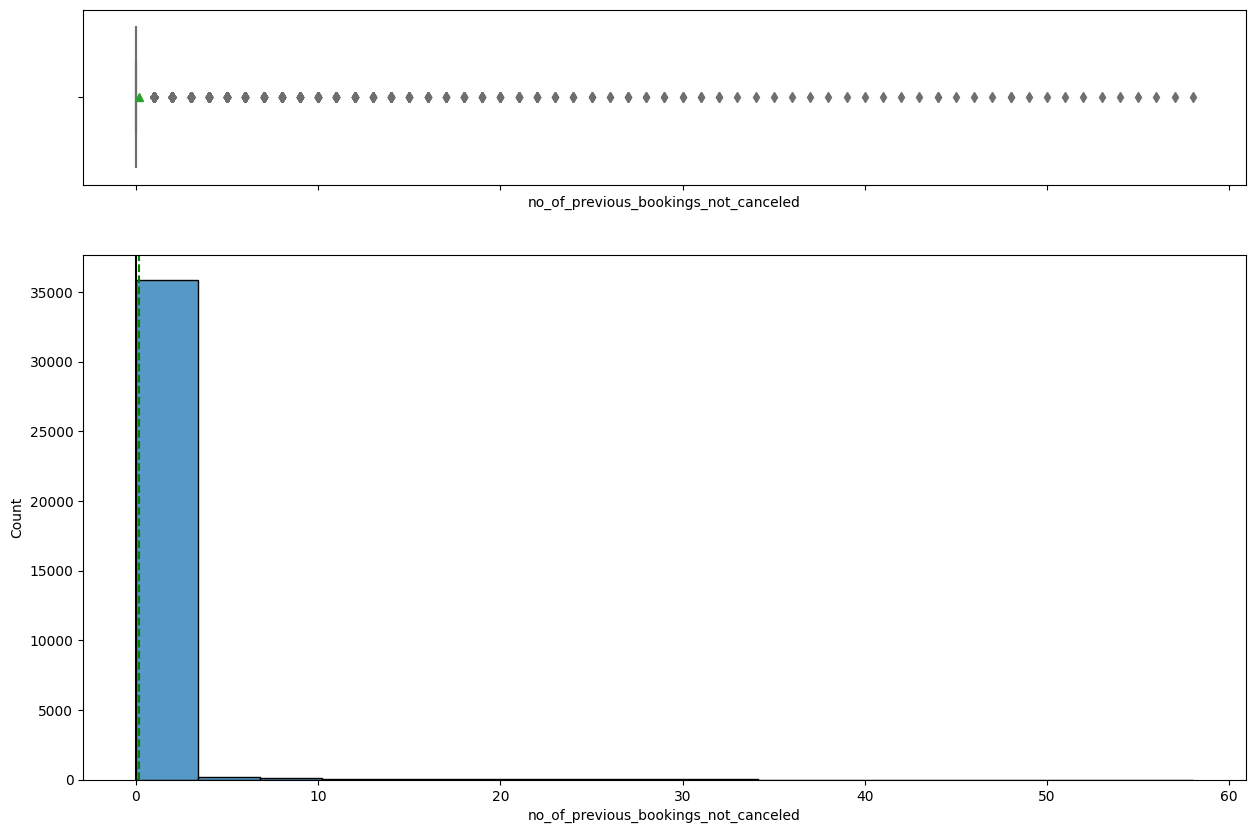

In [ ]:
histogram_boxplot(data, 'no_of_previous_bookings_not_canceled')

- Distribution is heavily right skewed, a range of 58, and with everything considered an outliter past 0
- Majority were zero cancellations previous

####Observations on Average Price Per Room

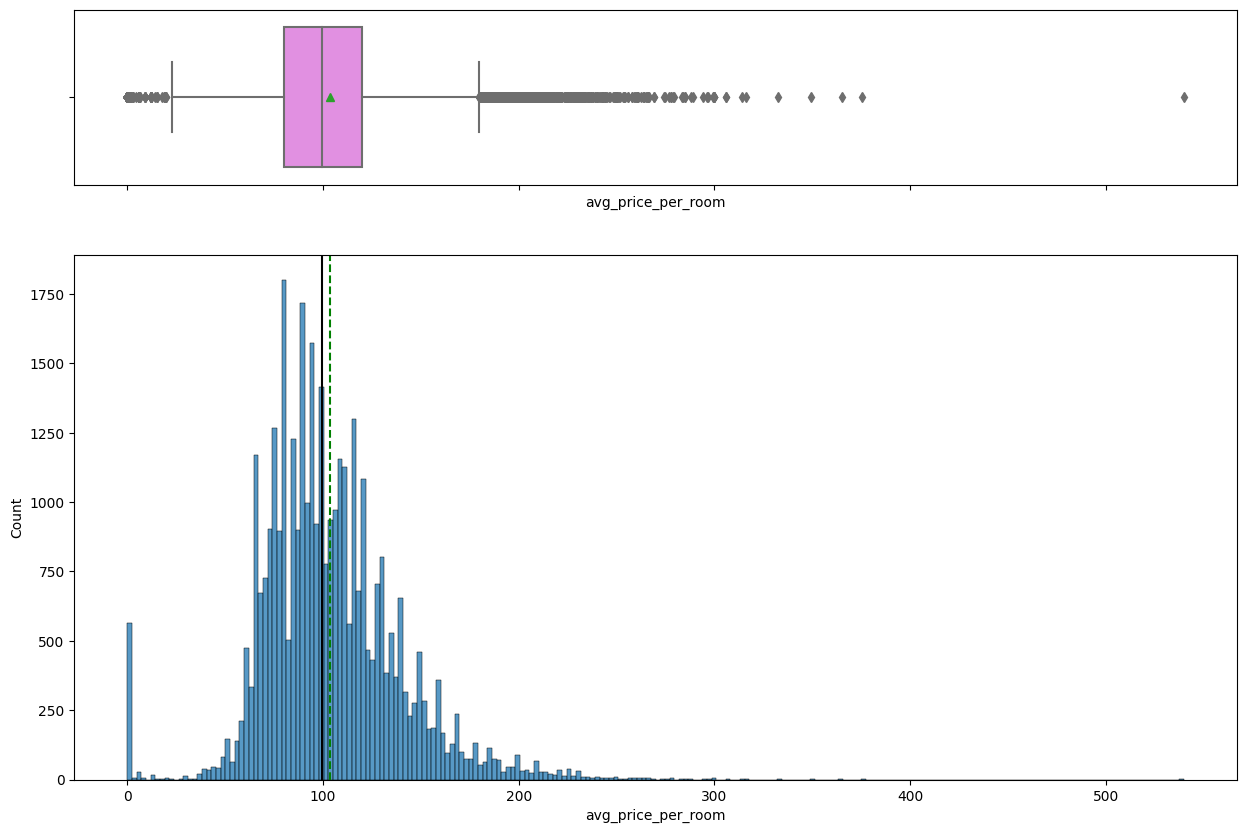

In [ ]:
histogram_boxplot(data, 'avg_price_per_room')

- Distribution is right skewed because of very high outliers (this could be because of room type and time of year), median of approx €100 (mean slightly higher), range of ~540, with outliers on both sides
- There is a high amount at €0, so these were rooms given to for free, and this number is higher than the number of complimentary rooms given out, so we will look at this

In [ ]:
# Checking to see how the free rooms were given by market segment
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

- Most were complementary (~65%), but ~35% were free online
- maybe they were running a give away online, but this is interesting

####Observations on Number of Special Requests

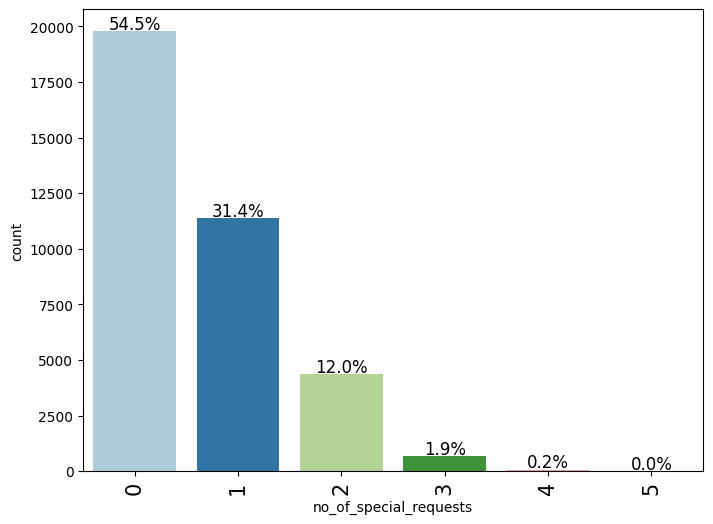

In [ ]:
labeled_barplot(data, 'no_of_special_requests', perc=True)

- Distribution is right skewed, with a median of zero.
- Majority of special requests is 0, followed by 1 and 2.
- Requests 1 or less is ~85%
- Requests 2 or less is ~97%

####Observations on Booking Status (canceled of Not)

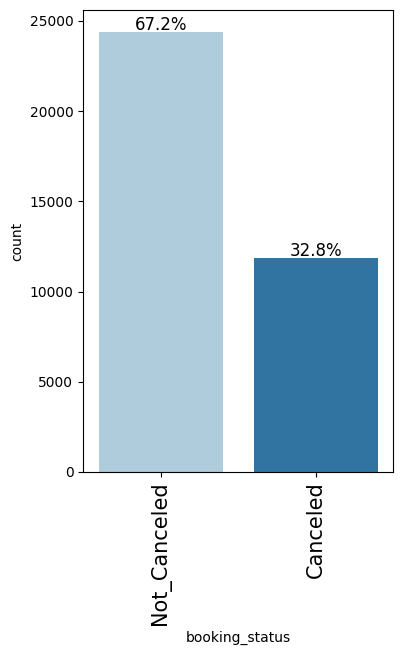

In [ ]:
labeled_barplot(data,'booking_status', perc=True)

- Most did not cancel their reservation (~67%).

Question 4 - Answered
- The percentage of bookings that are canceled is approx. 33%

###Bivariate Analysis

#### Functions to Help with Bivariate Analysis

In [ ]:
#function to create stacked bar plots

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

In [ ]:
# function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

####Heatmap of Numerical Columns

In [ ]:
#Creating a list of numerical columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
num_cols

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'total_guests',
 'total_nights']

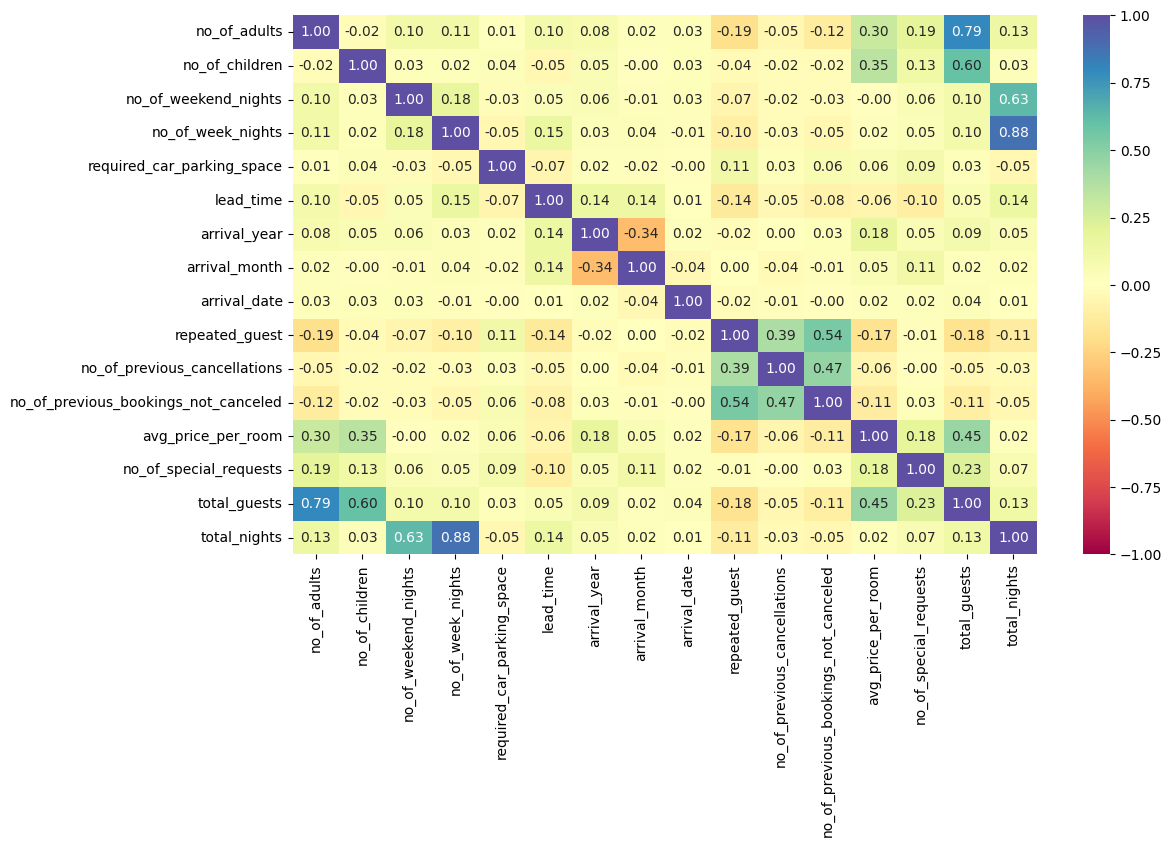

In [ ]:
#Creating heatmap of numerical data
  #columns I created (total_guests and total_nights) are present here as well for analysis
plt.figure(figsize=(12, 7))
sns.heatmap(data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral");

- Repeated guests has a positive moderate-weak correlation with number of previous bookings not canceled and number of previous cancelation
  - This makes sense since to have more cancelations or not you would have to be a repeated guest

- Number of previous bookings not canceled and number of previous cancelations have a positive moderate-weak correlation

- Average Price per Room has a weak positive correlation with number of children and adult guests, subsequently so does total guests
  - This makes sense since more people to stay the larger the room or more rooms have to order; therefore, a larger cost
-Average Price per Room was a week negative correlation with repeated guests
  - This is understandable because higher cost less likely you will be a repeated guest

- Arrival Month and arrival Year have a weak negative correlation

- Obvious ones that were added to dataset are:
  - Total Guest has moderate-strong positive correlation with number of Adult and Children
  - Total Nights has moderate-strong positive correlation with number of week days and weeknights

####Comparing Hotel Rates with other variables

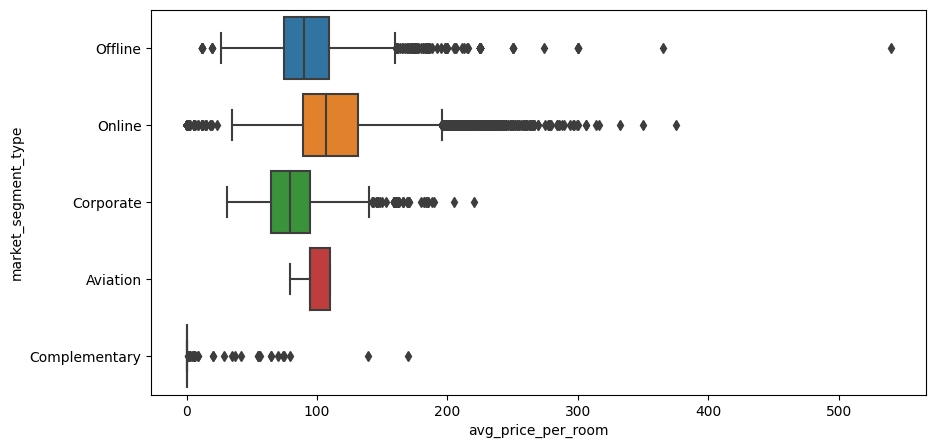

In [ ]:
#Rates vs Market Segment Type
plt.figure(figsize= (10,5))
sns.boxplot(data=data, x='avg_price_per_room', y='market_segment_type');


- Aviation has the smallest range of room rates, and is the only one with no outliers
- Online has the highest average room rates
- Complimentary has the lowest average rate.  It is interesting how some complimentary rooms still cost money and some even more than the average room rate.
- Excluding outliers Online has the largest range, including outliers offline has the highest range
- Excluding Complimentary, Corporate has the lowest median room rate

Question 3 - Answered
- Online has the highest median room rate.  Aviation is the most consistent.  Excluding Complementary, Corporate has the lowest median room rate.  

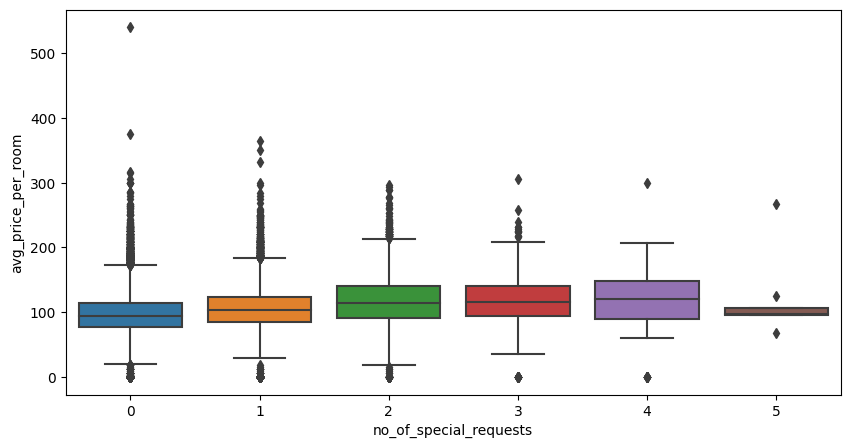

In [ ]:
#Rates vs Number of Special Requests
plt.figure(figsize= (10,5))
sns.boxplot(data=data, y='avg_price_per_room', x='no_of_special_requests');

- Zero requests has the smallest median, but the most variablility including outliers
- Four requests made has the highest median cost

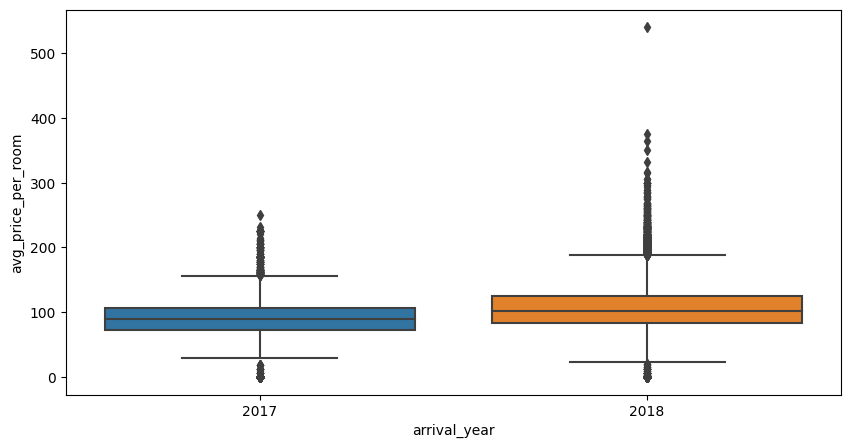

In [ ]:
#Rates vs Arrival Year
plt.figure(figsize= (10,5))
sns.boxplot(data=data, y='avg_price_per_room', x='arrival_year');

- 2017 has less variability and a smaller median than 2018

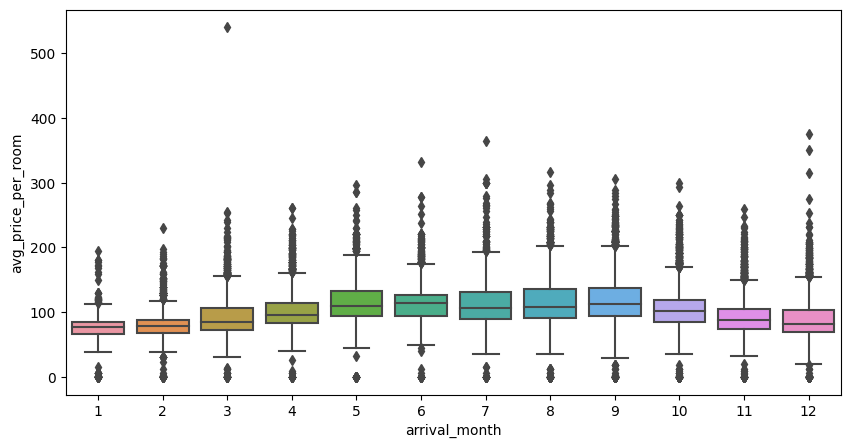

In [ ]:
#Rates vs Arrival Month
plt.figure(figsize= (10,5))
sns.boxplot(data=data, y='avg_price_per_room', x='arrival_month');

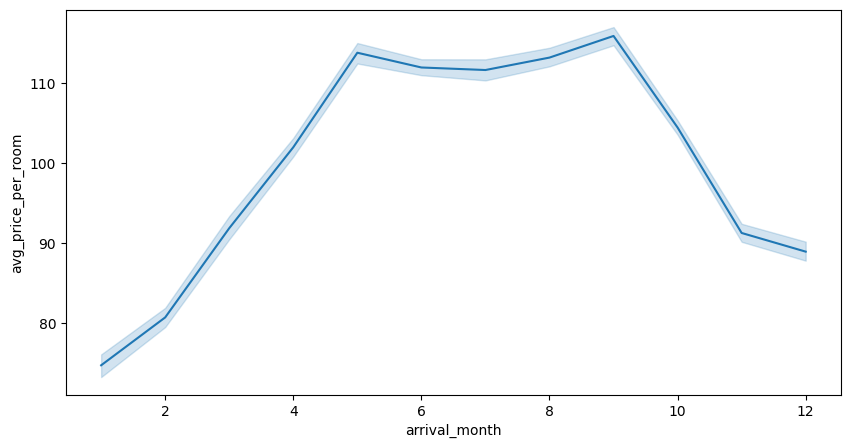

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data = data,y='avg_price_per_room', x='arrival_month');

- The middle months of the year seem to have the higher cost per room (May - September)
- The biggining and ending months of the year have the lower cost per room
- All months have outliers. March had the highest outlier.
- Prices increase at the beginning of the year stay high in the middle of the year and then drop off toward the end of the year

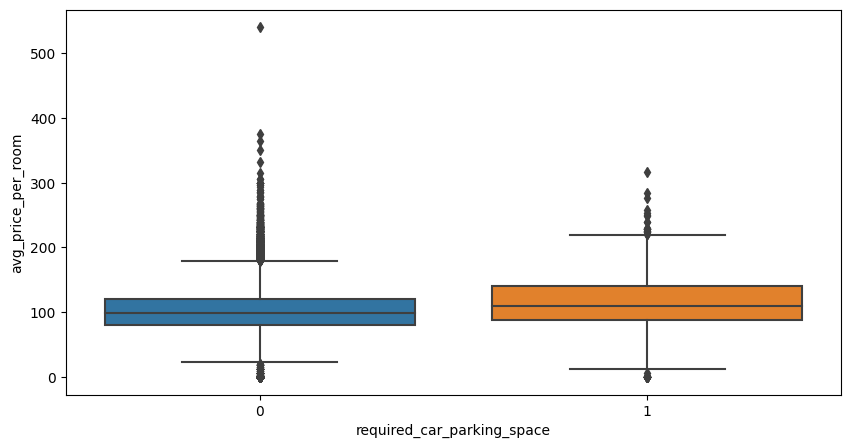

In [ ]:
#Rates vs Required Parking Space

plt.figure(figsize= (10,5))
sns.boxplot(data=data, y='avg_price_per_room', x='required_car_parking_space');

- Requiring a car space has a higher median price than no car parking space

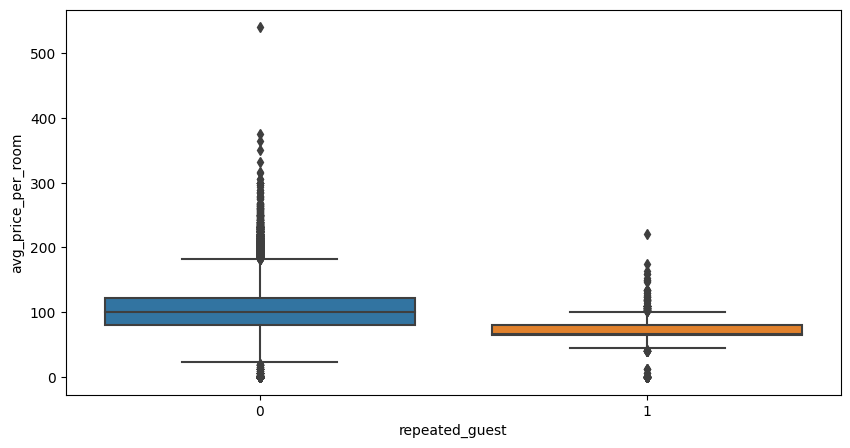

In [ ]:
#Rates vs Repeated Guests
plt.figure(figsize= (10,5))
sns.boxplot(data=data, y='avg_price_per_room', x='repeated_guest');

- Repeated Guests has a smaller average price and less variablility

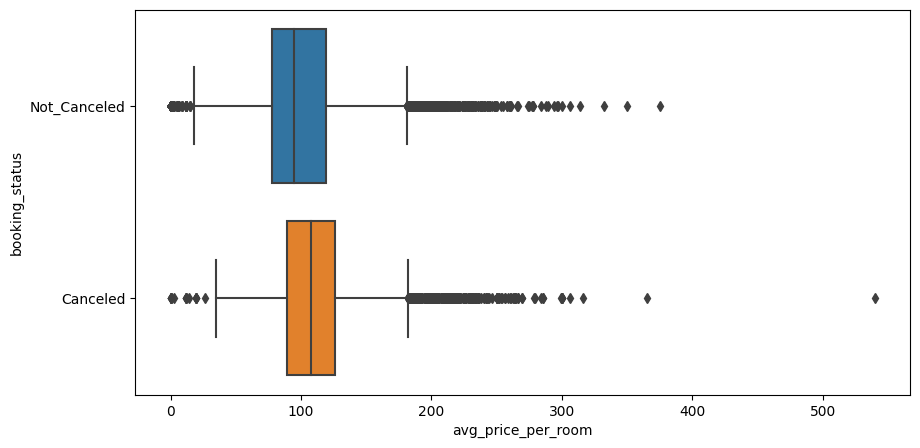

In [ ]:
#Rates vs Booking_Status
plt.figure(figsize= (10,5))
sns.boxplot(data=data, x='avg_price_per_room', y='booking_status');

- Canceled Rooms had a higher median than non-canceled rooms

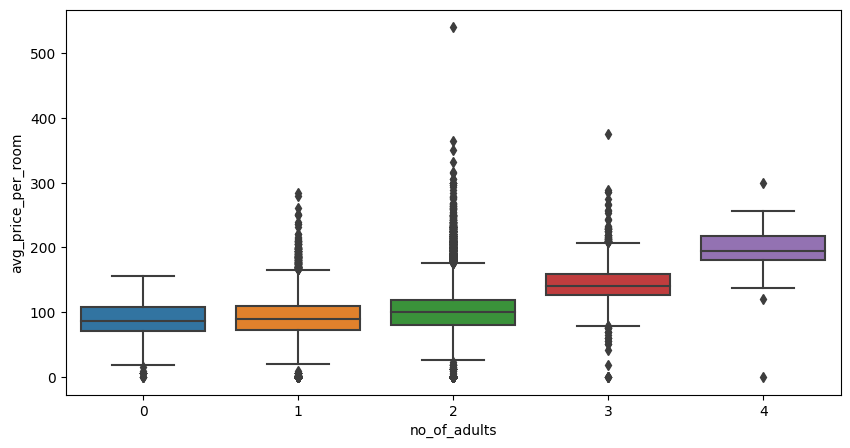

In [ ]:
#Rates vs Number of Adults
plt.figure(figsize= (10,5))
sns.boxplot(data=data, y='avg_price_per_room', x='no_of_adults');

- As number of Adults increase so does the average price per room

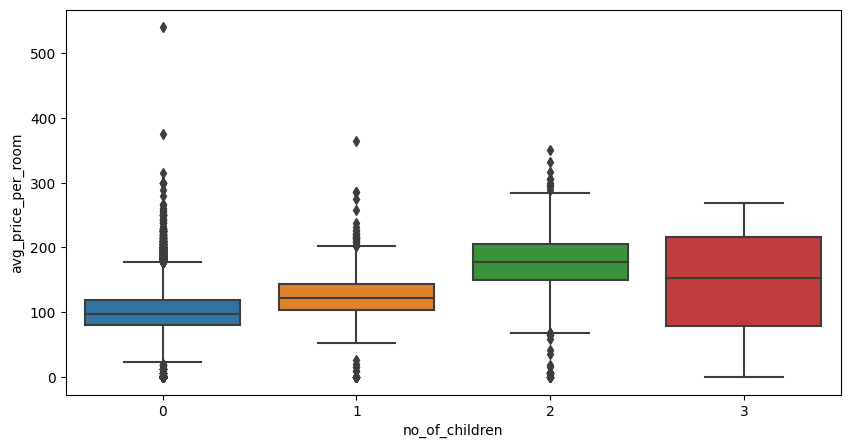

In [ ]:
#Rates vs Number of Children
plt.figure(figsize= (10,5))
sns.boxplot(data=data, y='avg_price_per_room', x='no_of_children');

- 2 children per room has the higest median
- 0 children has the lowest median

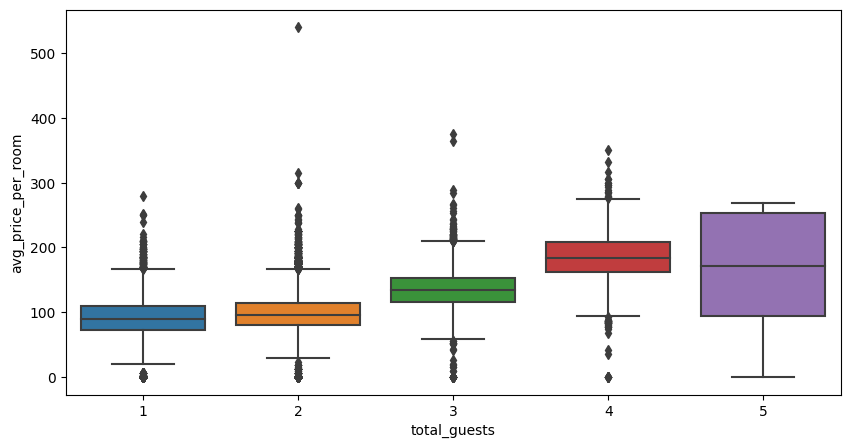

In [ ]:
#Rates vs Total Number of Guests

plt.figure(figsize= (10,5))
sns.boxplot(data=data, y='avg_price_per_room', x='total_guests');

- As number of guests increase so does the average pricing until 5 guests
- 1 and 2 guests quartile 3 is less than the others quartile 1 (5 guests is close). Stating their 75th percentile rates for 1 and 2 guests are lower than the 25th quartile of others.
- 1 and 2 guests seem to get the best average price per room

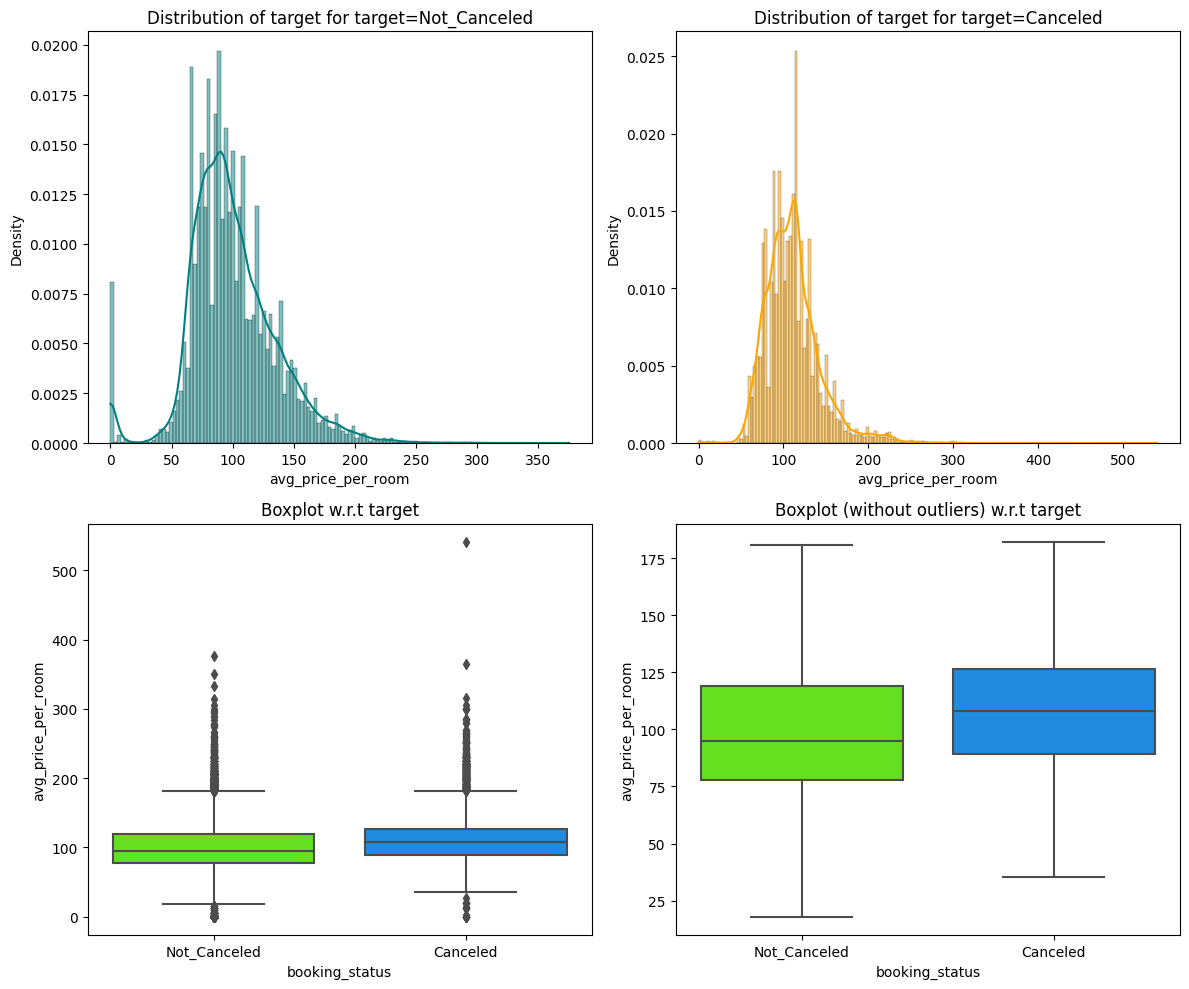

In [ ]:
# Cancellation status vs Average Price Per Room
distribution_plot_wrt_target(data, 'avg_price_per_room', 'booking_status')

- Appears the more expensive rooms are canceled more frequently

####Comparing Target Variable (Cancellation Status) with other Variables

booking_status  Canceled  Not_Canceled    All
no_of_adults                                 
All                11885         24390  36275
2                   9119         16989  26108
1                   1856          5839   7695
3                    863          1454   2317
0                     44            95    139
4                      3            13     16
------------------------------------------------------------------------------------------------------------------------


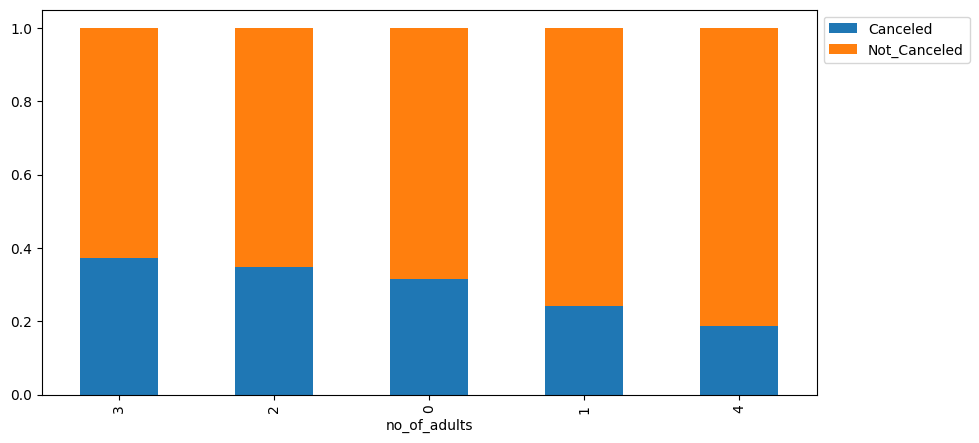

In [ ]:
# Cancellation status vs Adult Guests

stacked_barplot(data, 'no_of_adults', 'booking_status')

- The least canceled was with 4 adults
- The most canceled was with 3 adults

booking_status  Canceled  Not_Canceled    All
no_of_children                               
All                11885         24390  36275
0                  10882         22695  33577
1                    540          1078   1618
2                    457           601   1058
3                      6            16     22
------------------------------------------------------------------------------------------------------------------------


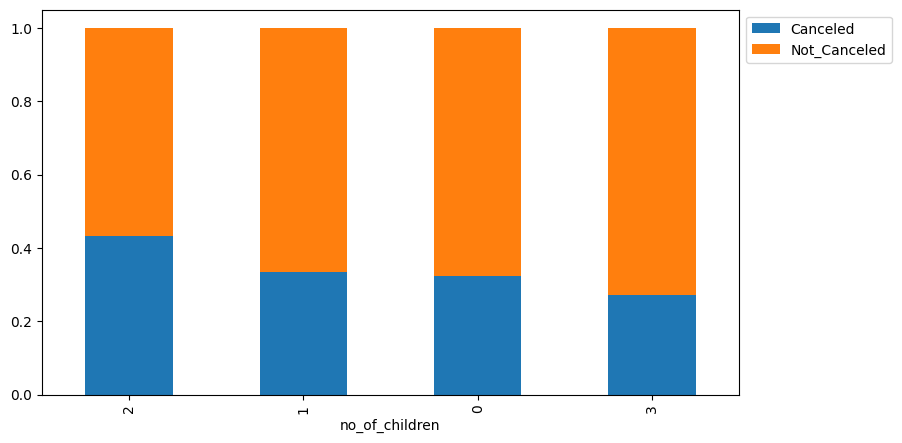

In [ ]:
# Cancellation status vs Children Guests

stacked_barplot(data, 'no_of_children', 'booking_status')

- Most canceled was with 2 children
- Least canceled was with 3 children
- 0 and 1 child is about the same cancellation rate


booking_status  Canceled  Not_Canceled    All
total_guests                                 
All                11885         24390  36275
2                   8280         15662  23942
1                   1809          5743   7552
3                   1392          2459   3851
4                    398           515    913
5                      6            11     17
------------------------------------------------------------------------------------------------------------------------


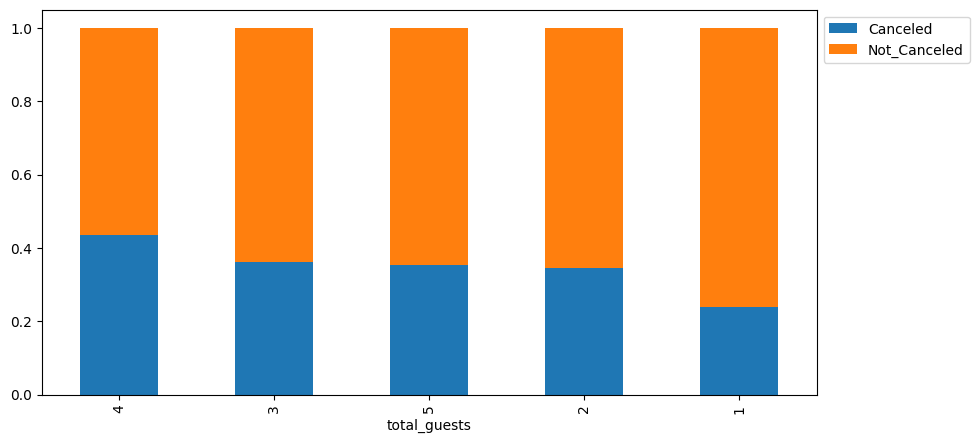

In [ ]:
# Cancellation status vs Total Guests

stacked_barplot(data,'total_guests', 'booking_status')

 - Single guests canceled the least
 - Four guests canceled the most
 - 3-5 are about the same

booking_status        Canceled  Not_Canceled    All
no_of_weekend_nights                               
All                      11885         24390  36275
0                         5093         11779  16872
1                         3432          6563   9995
2                         3157          5914   9071
4                           83            46    129
3                           74            79    153
5                           29             5     34
6                           16             4     20
7                            1             0      1
------------------------------------------------------------------------------------------------------------------------


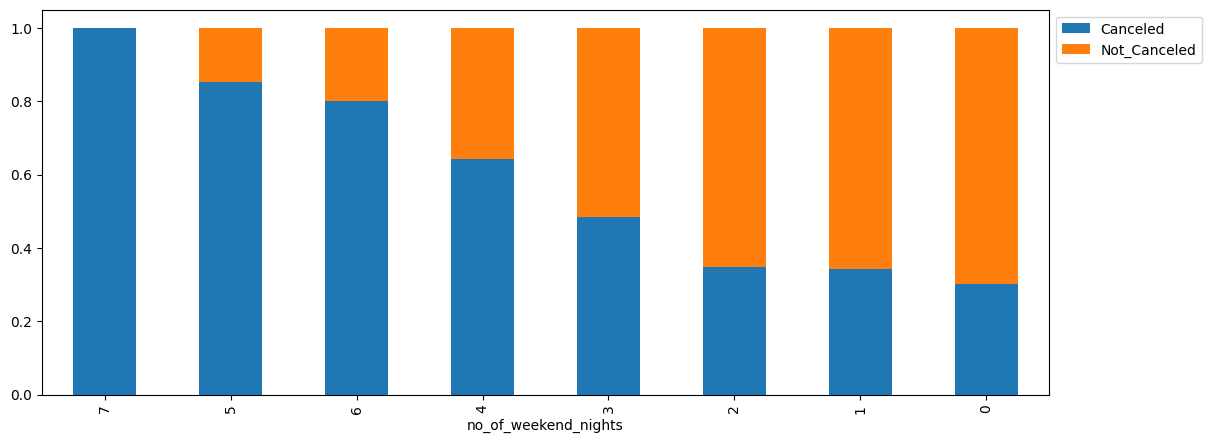

In [ ]:
# Cancellation status vs Weekend Nights

stacked_barplot(data, 'no_of_weekend_nights', 'booking_status')

- More weekend nights reserved coincides with higher percent of cancellations

booking_status     Canceled  Not_Canceled    All
no_of_week_nights                               
All                   11885         24390  36275
2                      3997          7447  11444
3                      2574          5265   7839
1                      2572          6916   9488
4                      1143          1847   2990
0                       679          1708   2387
5                       632           982   1614
6                        88           101    189
10                       53             9     62
7                        52            61    113
8                        32            30     62
9                        21            13     34
11                       14             3     17
15                        8             2     10
12                        7             2      9
13                        5             0      5
14                        4             3      7
16                        2             0      2
17                  

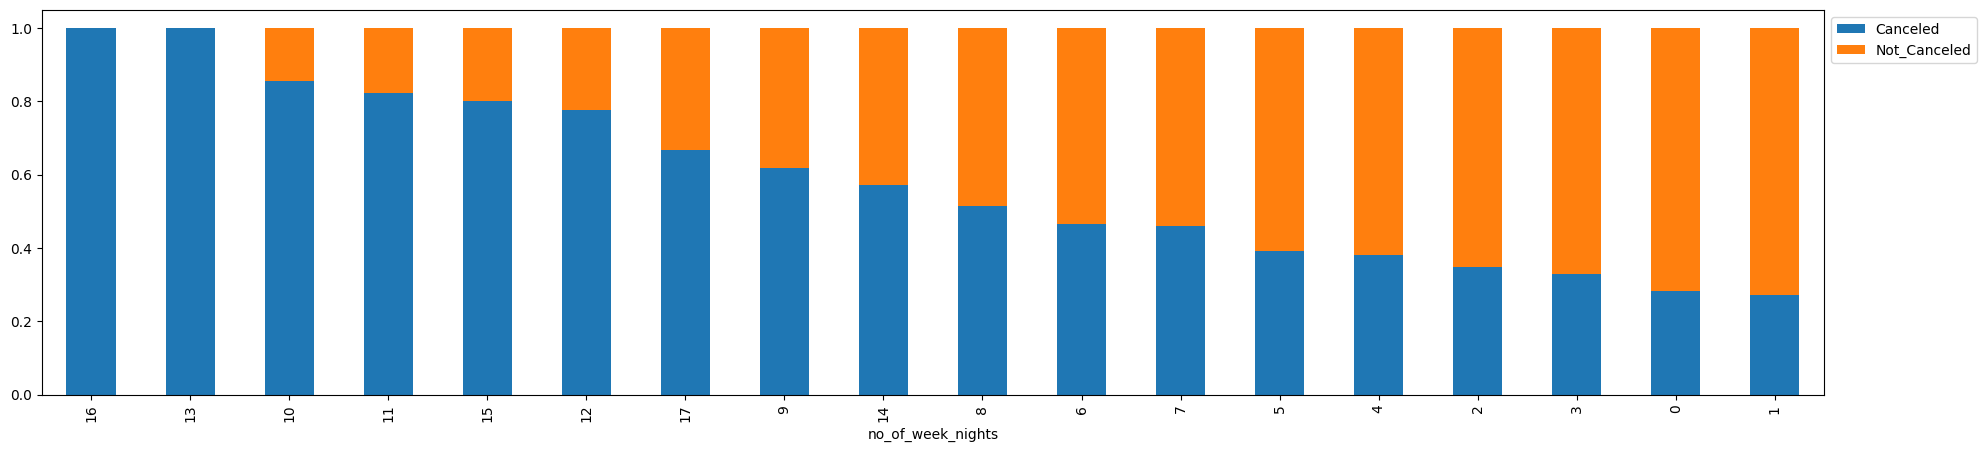

In [ ]:
# Cancellation status vs Week Nights

stacked_barplot(data, 'no_of_week_nights', 'booking_status')

- In general, more week nights reserved coincides with higher percent of cancellations

booking_status  Canceled  Not_Canceled    All
total_nights                                 
All                11885         24390  36275
3                   3586          6466  10052
2                   2899          5573   8472
4                   1941          3952   5893
1                   1466          5138   6604
5                    823          1766   2589
6                    465           566   1031
7                    383           590    973
8                     79           100    179
10                    58            51    109
9                     53            58    111
14                    27             5     32
15                    26             5     31
13                    15             3     18
12                    15             9     24
11                    15            24     39
20                     8             3     11
16                     5             1      6
19                     5             1      6
17                     4          

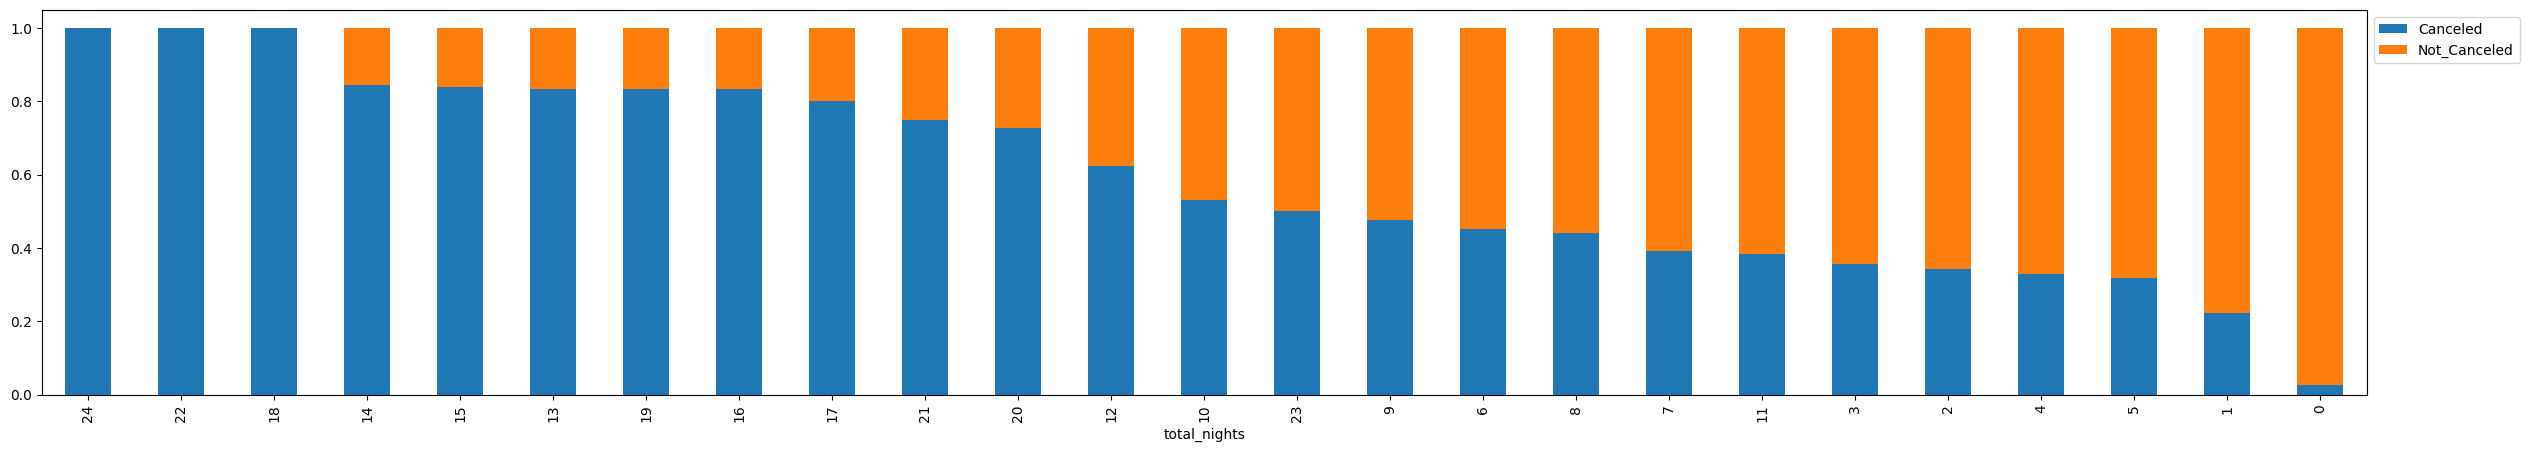

In [ ]:
# Cancellation status vs Total Nights

stacked_barplot(data, 'total_nights', 'booking_status')

- Typically more days reserved coincides with a higher percent of canellation

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


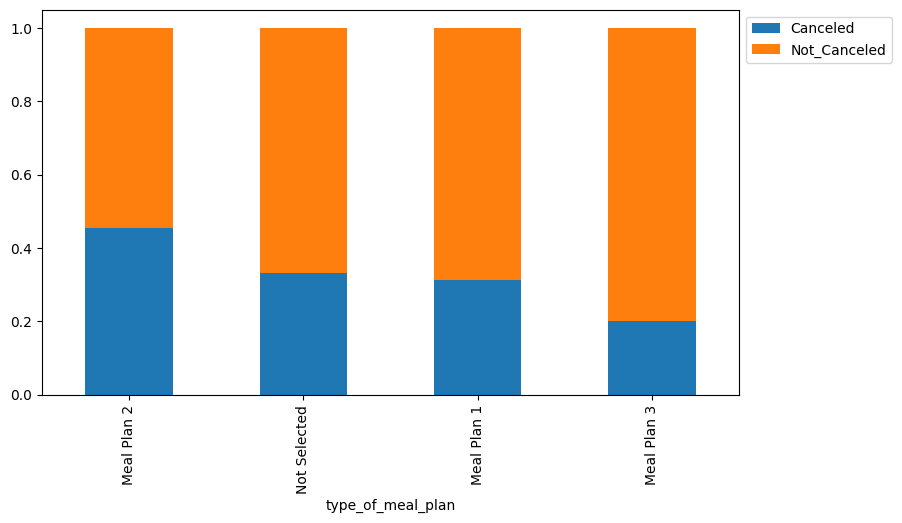

In [ ]:
# Cancellation status vs type of meal plan

stacked_barplot(data, 'type_of_meal_plan', 'booking_status')

- Meal Plan 2 canceled almost half the time
- Meal Plan 3 canceled the least, given there were only 5 bookings that chose this meal plan

booking_status              Canceled  Not_Canceled    All
required_car_parking_space                               
All                            11885         24390  36275
0                              11771         23380  35151
1                                114          1010   1124
------------------------------------------------------------------------------------------------------------------------


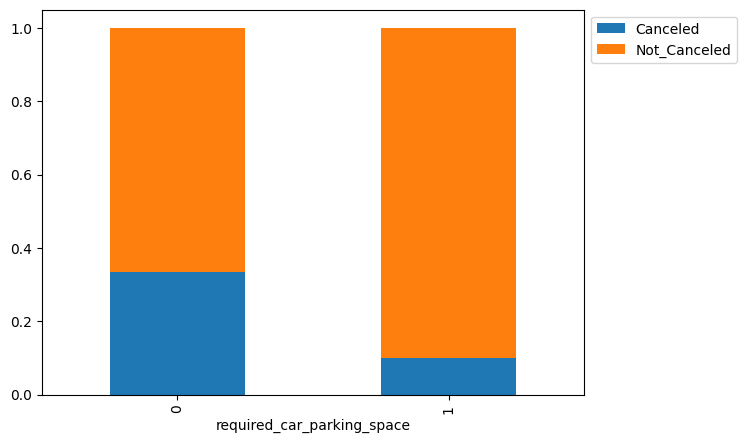

In [ ]:
# Cancellation status vs Requiring a car parking space

stacked_barplot(data, 'required_car_parking_space', 'booking_status')

- Not requiring a parking space guests cancel at 3x's the rate as requiring a parking space

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11885         24390  36275
Room_Type 1             9072         19058  28130
Room_Type 4             2069          3988   6057
Room_Type 6              406           560    966
Room_Type 2              228           464    692
Room_Type 5               72           193    265
Room_Type 7               36           122    158
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


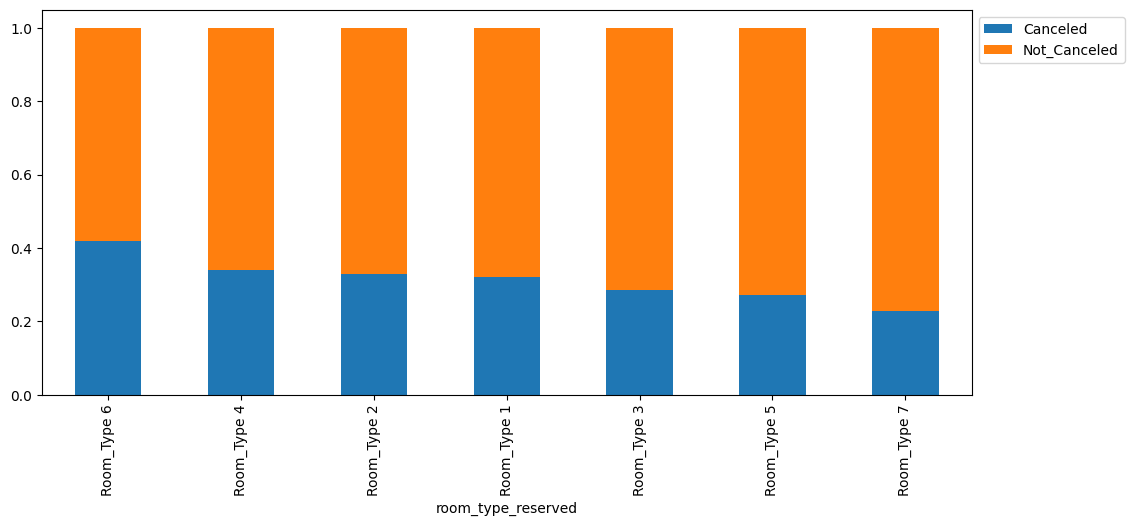

In [ ]:
# Cancellation status vs Room Type

stacked_barplot(data, 'room_type_reserved', 'booking_status')

- Room type 6 canceled the most
- Room type 7 canceled the least

booking_status  Canceled  Not_Canceled    All
arrival_year                                 
All                11885         24390  36275
2018               10924         18837  29761
2017                 961          5553   6514
------------------------------------------------------------------------------------------------------------------------


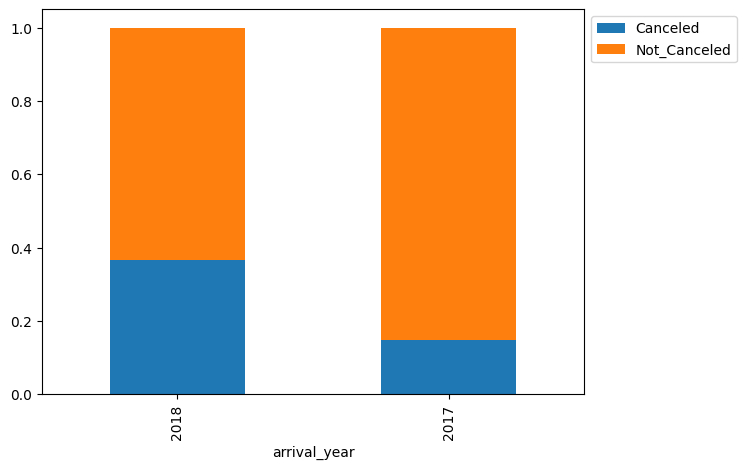

In [ ]:
# Cancellation status vs Arrival Year

stacked_barplot(data, 'arrival_year', 'booking_status')

- 2018 had more than double the percent cancel than in 2017

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


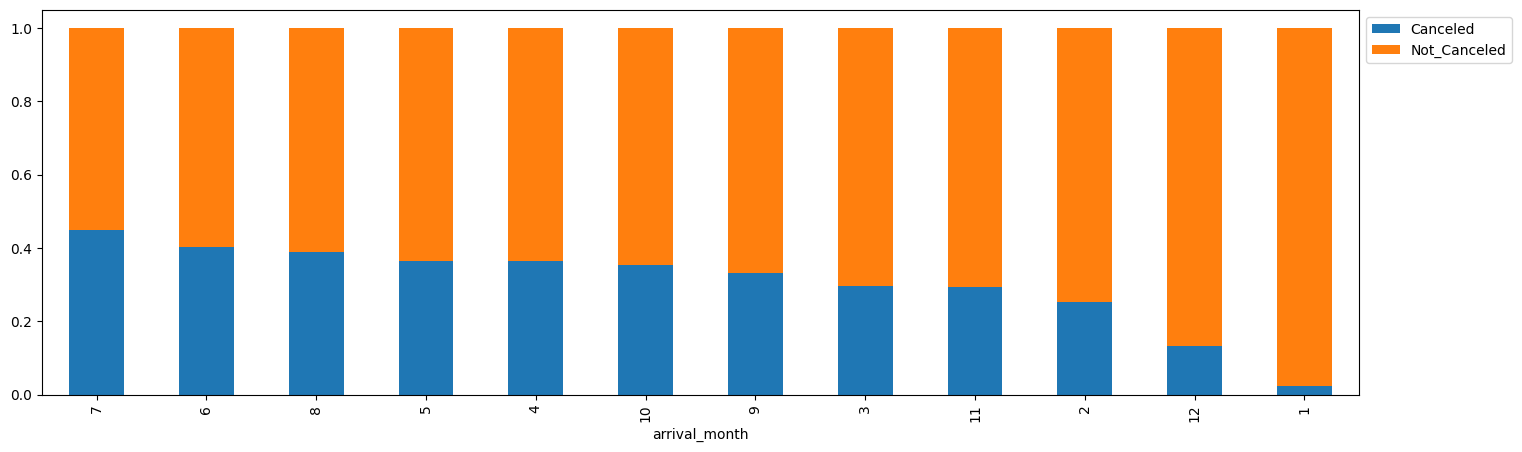

In [ ]:
# Cancellation status vs Arrival Month

stacked_barplot(data, 'arrival_month', 'booking_status')

- January has the least percent of cancelations
- July has the most percent of cancelations
- It appears the summer months have the highest percent of cancellations (June-August)

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


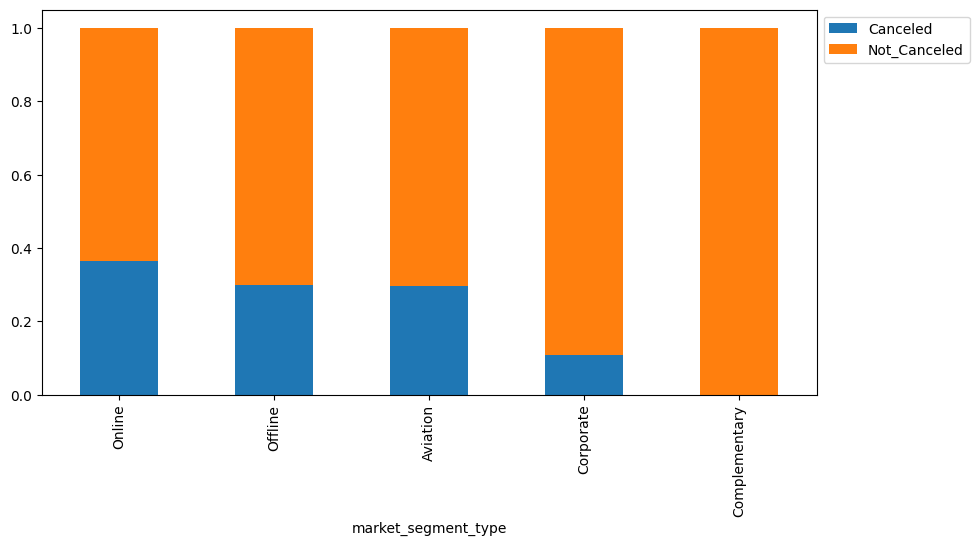

In [ ]:
# Cancellation status vs Market Segment

stacked_barplot(data, 'market_segment_type', 'booking_status')

- Online bookings canceled the most often
- Complementary canceled the least which would be expected, and then corporate was the next fewest cancellations

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


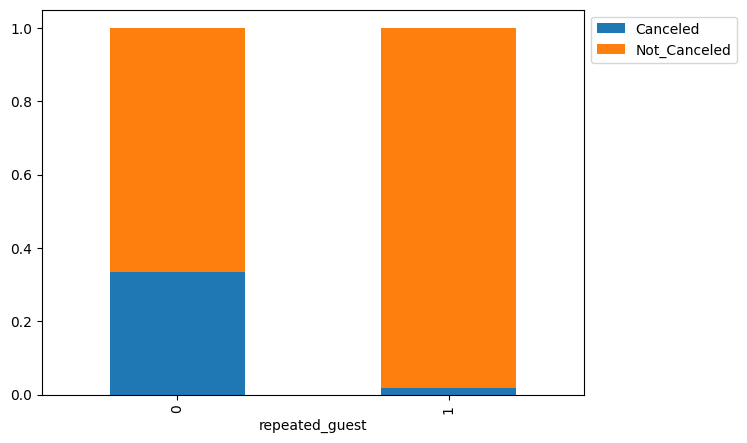

In [ ]:
# Cancellation status vs Repeated Guests

stacked_barplot(data, 'repeated_guest', 'booking_status')

- Repeated Guests are very unlikely to cancel (at less than 2%)

Question 5 - Answered
- Repeated guests cancel less than 2% of the time, compared to non-repeat guests who cancel about a third of the time.

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


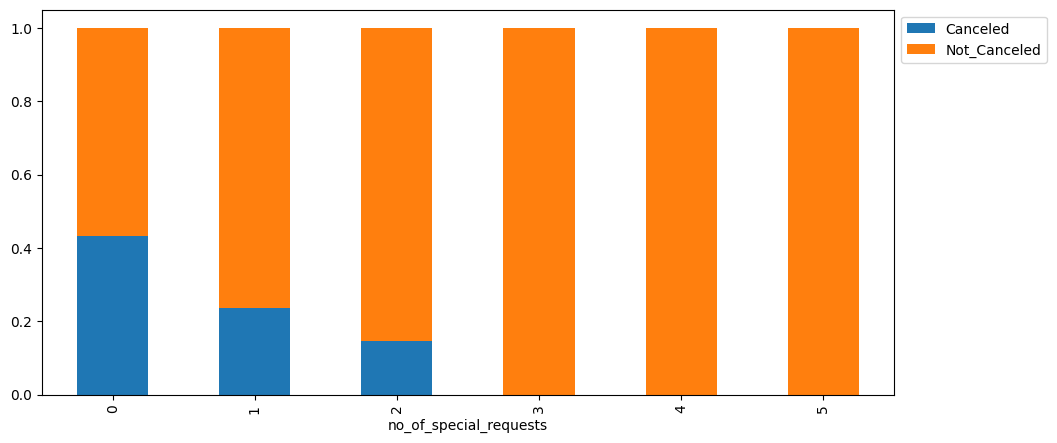

In [ ]:
# Cancellation status vs Special Requests

stacked_barplot(data, 'no_of_special_requests', 'booking_status')

- O special requests cancel over 40% of the time
- 3 or more special requests did not have any cancellations

Question 6 - Answered
- More special requests made appear to have a positive relationship that they will not cancel; therefore if a guest makes more requests it is likely they will show up for their reservation.

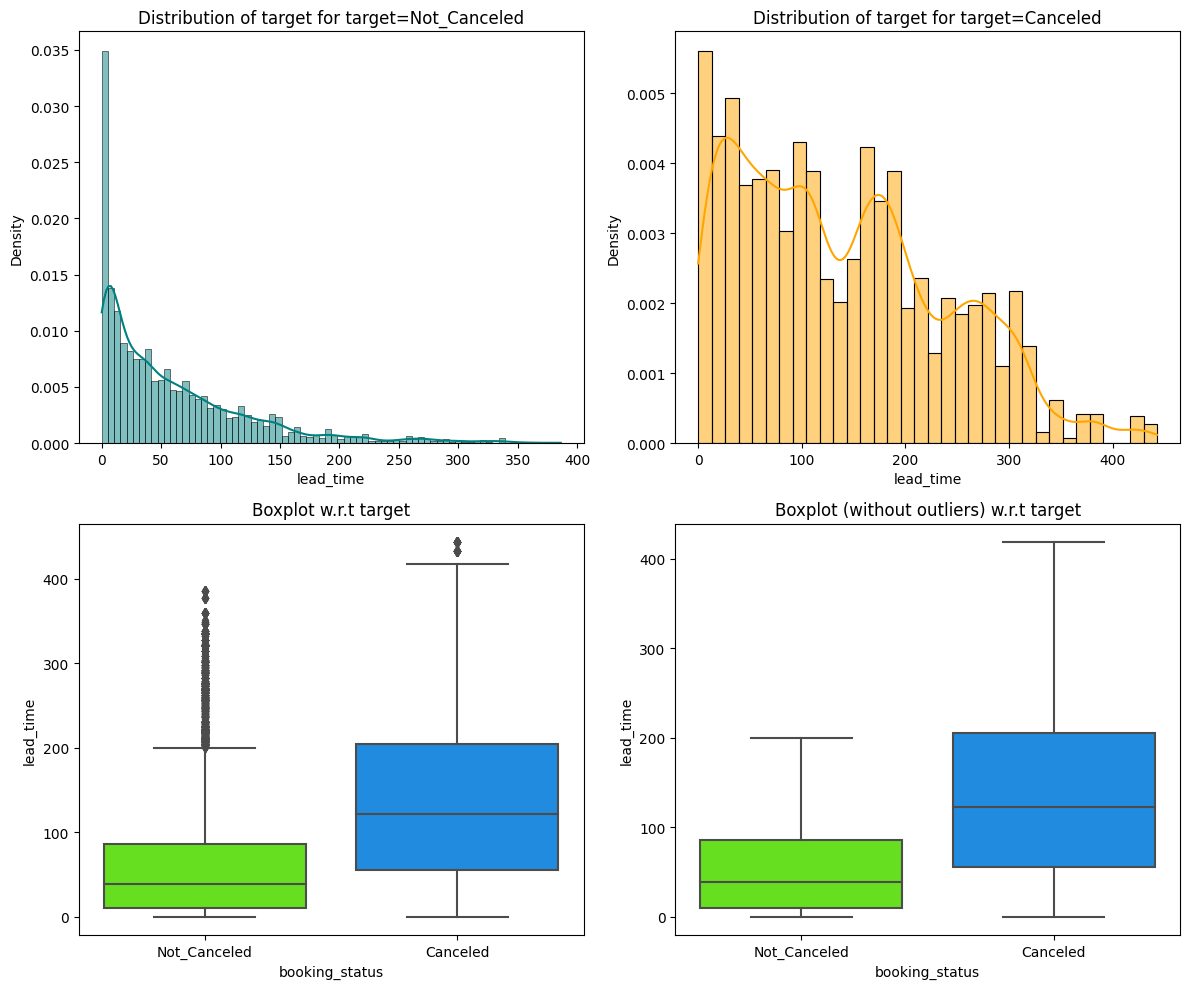

In [ ]:
# Cancellation status vs Lead Time
distribution_plot_wrt_target(data, 'lead_time', 'booking_status')

- Canceled reservations have a much higher lead time than non-canceled
  - This could be because when making it further in advance, there are more circumstances or time that could affect their plans for stay

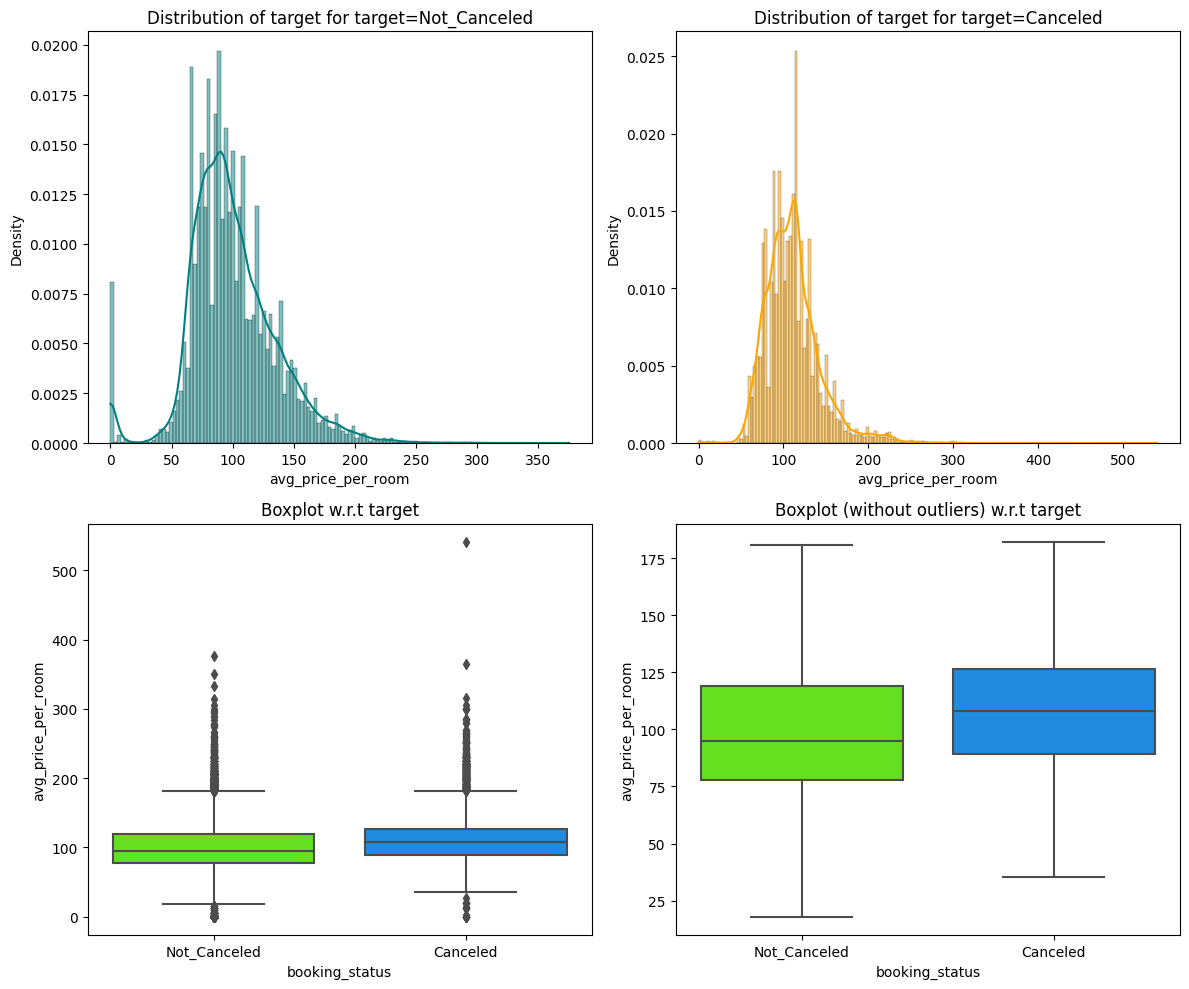

In [ ]:
# Cancellation status vs Average Price Per Room
distribution_plot_wrt_target(data, 'avg_price_per_room', 'booking_status')

- Appears the more expensive rooms are canceled more frequently

## Data Preprocessing

In [ ]:
# Removing Added Columns of Total Guests and Total Nights
data = data.drop(['total_guests'], axis=1)
data = data.drop(['total_nights'], axis=1)

In [ ]:
#checking to make sure it went back to original data
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

###Outlier Detection

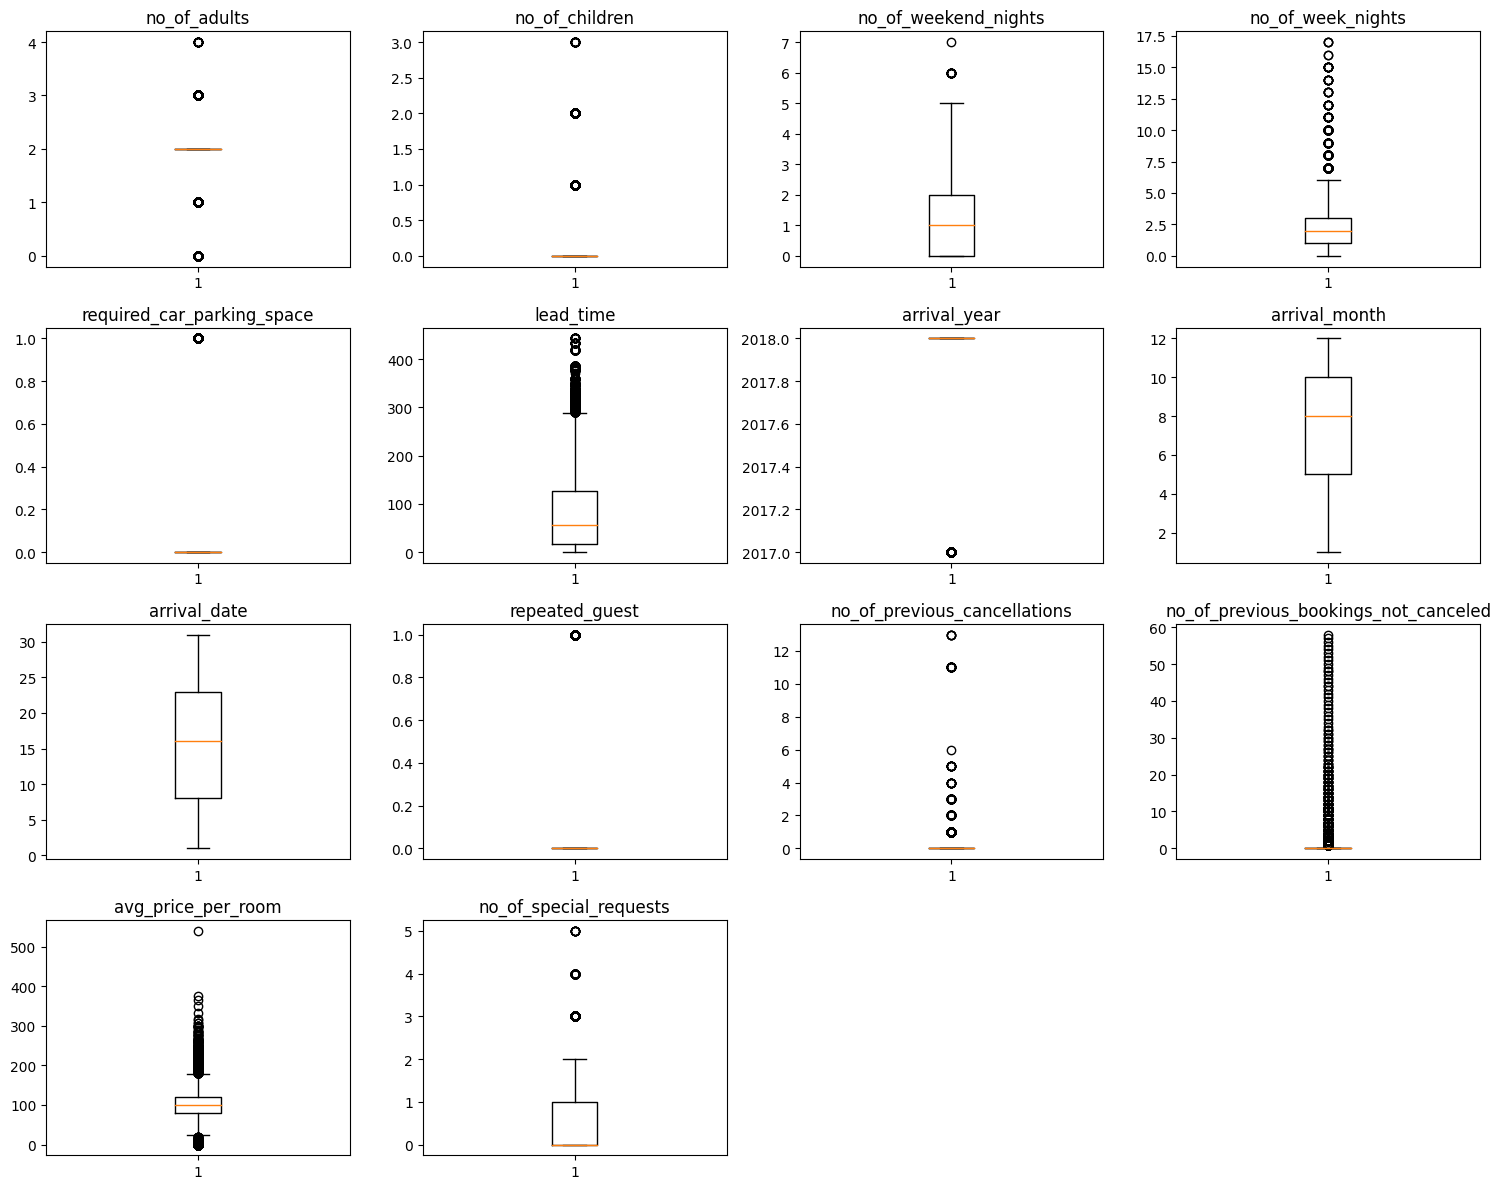

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations
- There are quite a few outliers in the data; however, we will not treat them as they are proper values

###Encoding Not_Canceled as 0 and Canceled as 1.  The hotel wants to find when bookings will be canceled.

In [ ]:
data['booking_status'] = data['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

#checking to make sure it encoded properly
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests  booking_status  
0                       0               0  
1                       1               0  
2                       0               1  
3                       0               1  
4                       0               1

###Creating training and test sets

In [ ]:
# specifying the independent and dependent variables
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# adding a constant to the independent variables
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
# Checking the data to see
  # -created dummy variables
    # - kept all numeric variables
      # - added constant
X.head()

const  no_of_adults  no_of_children  no_of_weekend_nights  \
0 1.00000             2               0                     1   
1 1.00000             2               0                     2   
2 1.00000             1               0                     2   
3 1.00000             2               0                     0   
4 1.00000             2               0                     1   

   no_of_week_nights  required_car_parking_space  lead_time  arrival_year  \
0                  2                           0        224          2017   
1                  3                           0          5          2018   
2                  1                           0          1          2018   
3                  2                           0        211          2018   
4                  1                           0         48          2018   

   arrival_month  arrival_date  repeated_guest  no_of_previous_cancellations  \
0             10             2               0                             0   
1             11             6               0                             0   
2              2            28               0                             0   
3              5            20               0                             0   
4              4            11               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
0                       0                              0   
1                       1                              0   
2                       0                              0   
3                       0                              0   
4                       0                              0   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                              0                               0   
1                              0                               1   
2                              0                               0   
3                              0                               0   
4                              0                               1   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                                  0                              0   
1                                  0                              0   
2                                  0                          

In [ ]:
# Making sure there are the same number of columns in test and training sets and looking at percentages in each
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


- From all the data we saw that not canceled(class 0) was approx. 67% and canceled(class 1)was approx. 33%, and this is preserved in the training and test sets.

# Building a Logistic Regression model

- Perform logistic regression using statsmodels, a Python module that provides functions for estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

- Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

In [ ]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(
    disp=False
)  # setting disp=False will remove the information on number of iterations

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sat, 23 Sep 2023   Pseudo R-squ.:                  0.3293
Time:                        03:42:26   Log-Likelihood:                -10793.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -923.2807    120.833     -7.641      0.000   -1160.110    -686.452
no_of_adults                             0.1136      

**Observations**

- Negative values of the coefficient show the probability of a person cancelling their reservation decreases with the increase of the corresponding attribute value.

- Positive values of the coefficient show that the probability of a person cancelling their reservation increases with the increase of the corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

**Model can make wrong predictions as**:

1. Predicting a reservation will be canceled but in reality they would show for the reservation. (False Positive)

2. Predicting a reservation will show up but in reality they cancel the reservartion. (False Negative)

**Which case is more important?**

* Both the cases are important as:

  * If we predict a reservation is going to cancel but actually don't cancel, then the hotel will not provide the service the guests signed up for causing a negative association to the hotel, which would not be good for their image. If their image is damaged, then they might lose out on other potential guests.

  * If we predict a reservation will not cancel but actually they cancel, then the hotel will lose out on the money made from the reservation, and might not have time to book the room to another potential guest or have to significantly discount the room to entice another reservation quickly (this is only if they did it in advance of the reservation day).


**How to reduce this loss?**

* We need to reduce both False Negatives and False Positives

* `f1_score` should be maximized as the greater the f1_score, the higher the chances of reducing both False Negatives and False Positives and identifying both the classes correctly
  * fi_score is computed as
  $$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

* The model_performance_classification_statsmodels function will be used to check the model performance of models.
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5 # this is the baseline threshold
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

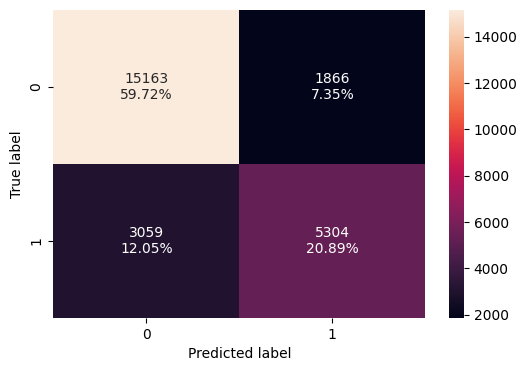

In [ ]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80604 0.63422    0.73975 0.68293

**Observations**

- The f1_score of the model is ~0.68 and we will try to maximize it further

- The variables used to build the model might contain multicollinearity, which will affect the p-values

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values

###Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

There are different ways of detecting (or testing for) multicollinearity. One such way is using the Variation Inflation Factor (VIF).

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model.

* **General Rule of thumb**:
  - If VIF is 1 then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence  the variance of $\beta_k$ is not inflated at all
  - If VIF exceeds 5, we say there is moderate multicollinearity
  - If VIF is equal or exceeding 10, it shows signs of high multi-collinearity

* The purpose of the analysis should dictate which threshold to use

In [ ]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                  39474810.78615
no_of_adults                                  1.35079
no_of_children                                2.09311
no_of_weekend_nights                          1.06947
no_of_week_nights                             1.09571
required_car_parking_space                    1.03992
lead_time                                     1.39491
arrival_year                                  1.43107
arrival_month                                 1.27563
arrival_date                                  1.00680
repeated_guest                                1.78348
no_of_previous_cancellations                  1.39569
no_of_previous_bookings_not_canceled          1.65199
avg_price_per_room                            2.05473
no_of_special_requests                        1.24796
type_of_meal_plan_Meal Plan 2                 1.27188
type_of_meal_plan_Meal Plan 3                 1.02526
type_of_meal_plan_Not Selected                1

- We will ignore the VIF values for dummy variables and the constant (intercept)
- The only high VIF values are for the dummy variables dealing with market segment, so we not drop any columns, and the values in the summary are reliable.
* Let's remove the insignificant features (p-value>0.05).

### Removing high p-value variables

**Observations**

* arrival_date, no_of_previous_bookings_not_canceled, type_of_meal_plan_Meal Plan 3, room_type_reserved_Room_Type 3, market_segment_type_Complementary, and market_segment_type_Online have p-value > 0.05. So, they are not significant and we'll drop them.

* But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.

* Instead, we will do the following repeatedly using a loop:
  - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
  - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
  - Repeat the above two steps till there are no columns with p-value > 0.05.


The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [ ]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [ ]:
X_train1 = X_train[selected_features]

In [ ]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sat, 23 Sep 2023   Pseudo R-squ.:                  0.3283
Time:                        03:42:31   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -916.0557    120.472     -7.604      0.000   -1152.176    -679.935
no_of_adults                       0.1087      0.037      2.911      0.

**Now no categorical feature has p-value greater than 0.05, so we'll consider the features in *X_train1* as the final ones and *lg1* as final model.**

### Coefficient interpretations

* Coefficients of no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, arrival_year, no_of_previous_cancellations, avg_price_per_room, type_of_meal_plan_Meal Plan 2, and type_of_meal_plan_Not Selected are **POSITIVE**.  
  - An increase in these will lead to an increase in chances of a reservation being canceled.
* Coefficients of required_car_parking_space, arrival_month, repeated_guest, no_of_special_requests, room_type_reserved_Room_Type 2, room_type_reserved_Room_Type 4, room_type_reserved_Room_Type 5, room_type_reserved_Room_Type 6, room_type_reserved_Room_Type 7, market_segment_type_Corporate, and market_segment_type_Offline are **NEGATIVE**.
  - An increase in these will lead to a decrease in chances of a reservation being canceled.

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [ ]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds           0.00000       1.11480         1.16576               1.11479   
Change_odd% -100.00000      11.47969        16.57635              11.47875   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                   1.04262                     0.20303    1.01583   
Change_odd%            4.26206                   -79.69675    1.58341   

             arrival_year  arrival_month  repeated_guest  \
Odds              1.57228        0.95850         0.06474   
Change_odd%      57.22767       -4.14986       -93.52598   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                              1.25723             1.01934   
Change_odd%                      25.72288             1.93423   

             no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
Odds                        0.22997                        1.17983   
Change_odd%               -77.00299                       17.98312   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                                1.33096                         0.70080   
Change_odd%                        33.09559                       -29.92003   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                                0.75421                         0.47931   
Change_odd%                       -24.57872                       -52.06881   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                                0.38040                         0.23889   
Change_odd%                       -61.96015                       -76.11050   

             market_segment_type_Corporate  market_segment_type_Offline  
Odds                               0.45323                      0.16752  
Change_odd%                      -54.67705                    -83.24783

**Coefficient interpretations**

- `no_of_adults`:  Holding all other features constant a unit change in number of adults will increase the odds of a reservation being canceled by ~1.11 times or a ~11.47% increase of odds.
- `required_car_parking_space`: Holding all other features constant a unit change in requiring a parking space will decrease the odds of a reservation being canceled by ~.20 or a ~79.7% decrease of odds.
- `repeated_guest`: Holding all other features constant a unit change in requiring a parking space will decrease the odds of a reservation being canceled by ~.06 or a ~93.52% decrease of odds.
- `type_of_meal_plan_Not Selected`: The odds of a reservation not selecting a meal type and canceling is ~1.33 times more than a reservation that selected meal plan 1 or 3, or ~33.09% greater odds of canceling than a reservation that selected meal plan 1 or 3. Similarly, the odds of a reservation selected meal type 2 and canceling is ~1.18 times more than a reservation that selected meal plan 1 or 3, or ~17.99% greater odds of canceling than a reservation that selected meal plan 1 or 3.[the dropped categories are type_of_meal_plan_Meal Plan 1,  type_of_meal_plan_Meal Plan 3 are taken as a reference level]
- `market_segment_type_Offline`: The odds a reservation was Corporate and canceling is ~.45 times less than a reservation made with Aviation, Online or Complementary, or ~54.74% less odds of canceling than a reservation made with Aviation, Online or Complementary. Similarly, the odds a reservation was Offline and canceling is ~.17 times less than a reservation made with Aviation, Online or Complementary, or ~83.25% less odds of canceling than a reservation made with Aviation, Online or Complementary.[the dropped categories are market_segment_type_Aviation, market_segment_type_Online, market_segment_type_Complementary are taken as a refrence level]

`Interpretation for other attributes can be done similarly.`

### Model performance evaluation

**Training set performance**

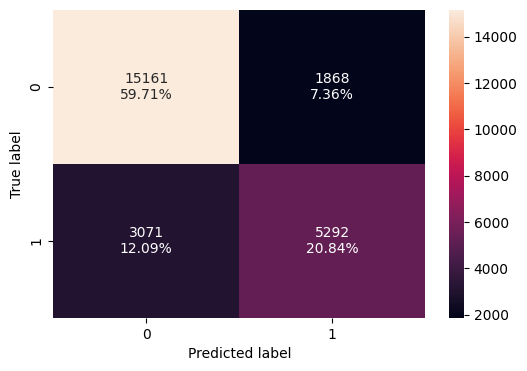

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [ ]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, X_train1, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision      F1
0   0.80549 0.63279    0.73911 0.68183

**Test set performance**

- We have to first drop the columns from the test set that were dropped from the training set.

In [ ]:
X_test1 = X_test[list(X_train1.columns)]

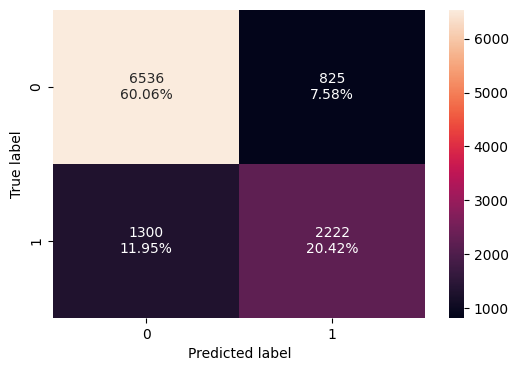

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test1, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision      F1
0   0.80474 0.63089    0.72924 0.67651

- The model is giving a good f1_score of ~0.68 on the train and test sets
- As the train and test performances are very similar, the model is not overfitting
- Moving forward we will try to improve the performance of the model

## Model Performance Improvement

* Let's see if the f1_score can be improved further by changing the model threshold
* First, we will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold
* Next, we will check the Precision-Recall curve to find the right balance between precision and recall as our metric of choice is f1_score

### ROC Curve and ROC-AUC

* ROC-AUC on training set

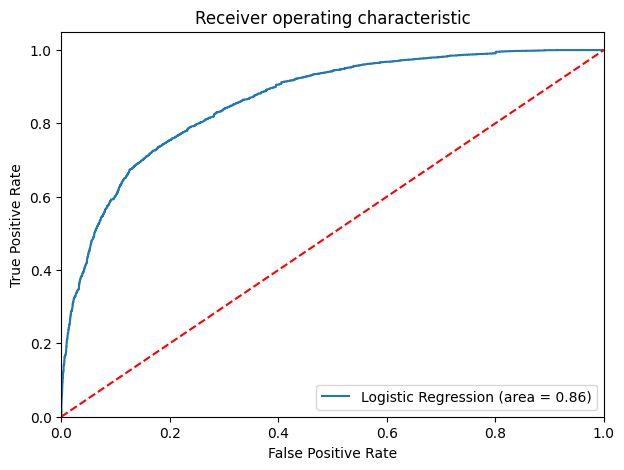

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.

### Optimal threshold using AUC-ROC curve

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where TPR is high and FPR is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3711235647822323


**Checking model performance on training set**

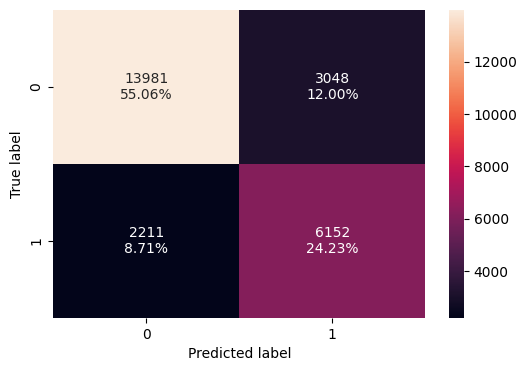

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.79289 0.73562    0.66870 0.70056

- Recall increased by ~10%, and F1 increased by ~2%
- Percision decreased by ~8%, and Accuracy decreased by ~1%
* The model is still giving a good performance.

**Checking model performance on test set**

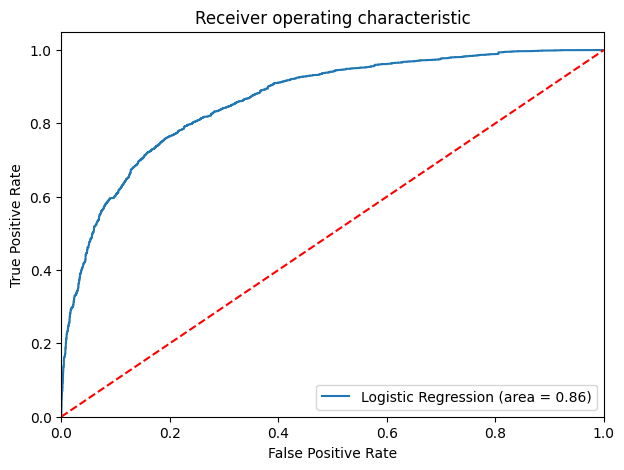

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

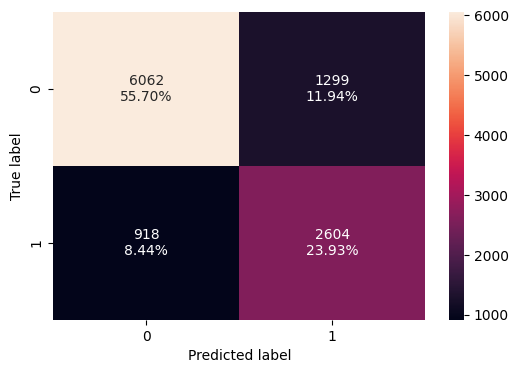

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.79629 0.73935    0.66718 0.70141

- As the train and test performances for ROC-AUC curve are very similar, the model is not overfitting

### Precision-Recall Curve

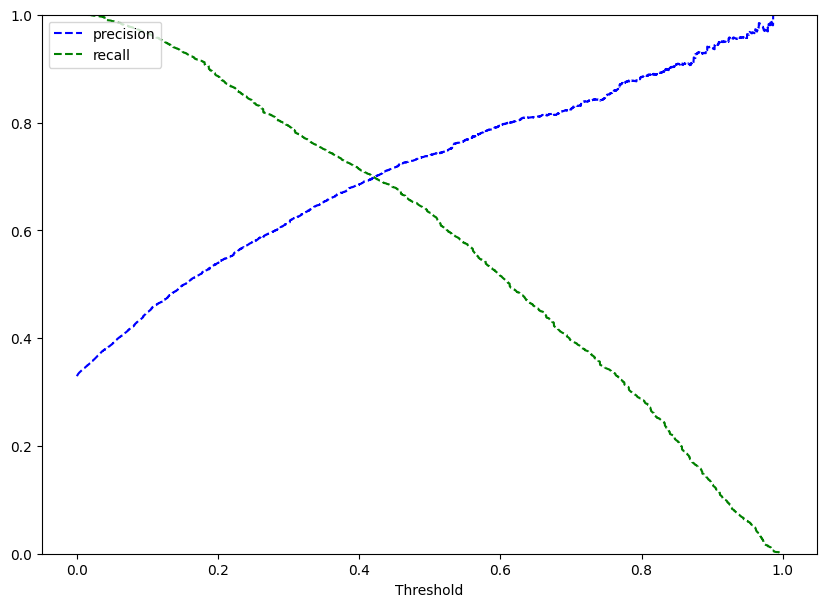

In [ ]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of approx 0.42, we get balanced recall and precision.

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.42

**Checking model performance on training set**

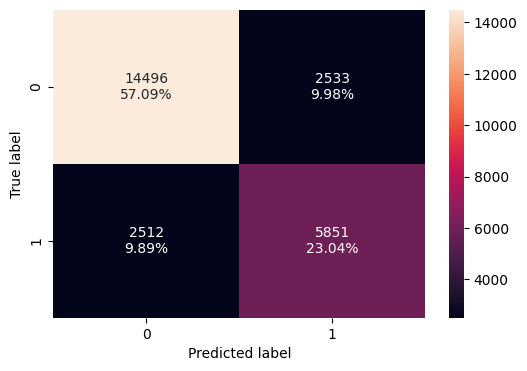

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision      F1
0   0.80132 0.69963    0.69788 0.69875

- F1 increased by ~2% and Recall increased by ~6% from the default threshold
- Percision decreased by ~4%, and Accuracy is about the same from the default threshold
- Model is performing well on training set.

**Checking model performance on test set**

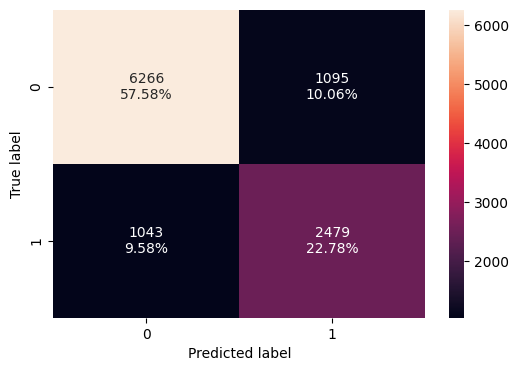

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision      F1
0   0.80355 0.70386    0.69362 0.69870

- As the train and test performances for Percision-Recall curve are very similar, the model is not overfitting

## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.80549   
Recall                                         0.63279   
Precision                                      0.73911   
F1                                             0.68183   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79289   
Recall                                0.73562   
Precision                             0.66870   
F1                                    0.70056   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80132  
Recall                                0.69963  
Precision                             0.69788  
F1                                    0.69875

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.80474   
Recall                                         0.63089   
Precision                                      0.72924   
F1                                             0.67651   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79629   
Recall                                0.73935   
Precision                             0.66718   
F1                                    0.70141   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80355  
Recall                                0.70386  
Precision                             0.69362  
F1                                    0.69870

- Almost all the three models are performing well on both training and test data without the problem of overfitting
- The model with a threshold of .37 is giving the best F1 score.
  - It is very slightly more than the threshold of .42.  
    - The difference is between recall and percision. They are both different by ~3%. .37 threshold is better on recall, while .42 threshold is better for percision. Since, the F1 score is about the same then the company would want to decide which is better for their situation.

- With a highest F1, **we will use a threshold of .37 as our best model.**

# Building a Decision Tree model

In [ ]:
#Checking the data set to make sure it is unchanged
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests  booking_status  
0                       0               0  
1                       1               0  
2                       0               1  
3                       0               1  
4                       0               1

### Data Preparation for Modeling

In [ ]:
X = data.drop(['booking_status'], axis=1)
y = data['booking_status']

In [ ]:
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
X.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                           0        224          2017             10   
1                           0          5          2018             11   
2                           0          1          2018              2   
3                           0        211          2018              5   
4                           0         48          2018              4   

   arrival_date  repeated_guest  no_of_previous_cancellations  \
0             2               0                             0   
1             6               0                             0   
2            28               0                             0   
3            20               0                             0   
4            11               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
0                       0                              0   
1                       1                              0   
2                       0                              0   
3                       0                              0   
4                       0                              0   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                              0                               0   
1                              0                               1   
2                              0                               0   
3                              0                               0   
4                              0                               1   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                                  0                              0   
1                                  0                              0   
2                                  0                              0   
3                                  0  

**Creating training and test sets.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])
print("Number of columns in train data =", X_train.shape[1])
print("Number of columns in test data =", X_test.shape[1])

Number of rows in train data = 25392
Number of rows in test data = 10883
Number of columns in train data = 27
Number of columns in test data = 27


In [ ]:
print("Percentage of classes in training set:") #classes = delequent or not
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


- There is a third of cancellations in both training and test sets, which is same to the overall data set

In [ ]:
#Building out the decison tree
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### First, let's create functions to calculate different metrics and confusion matrix so we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The make_confusion_matrix function will be used to plot confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Checking model performance on training set

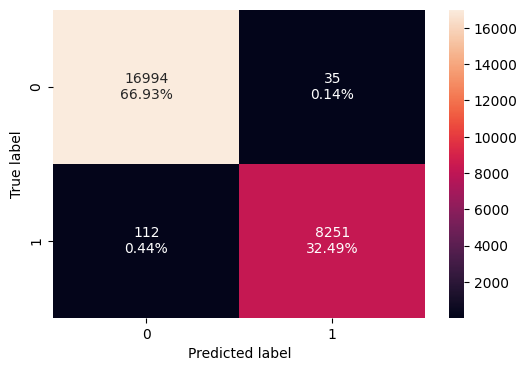

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.99421 0.98661    0.99578 0.99117

### Checking model performance on test set

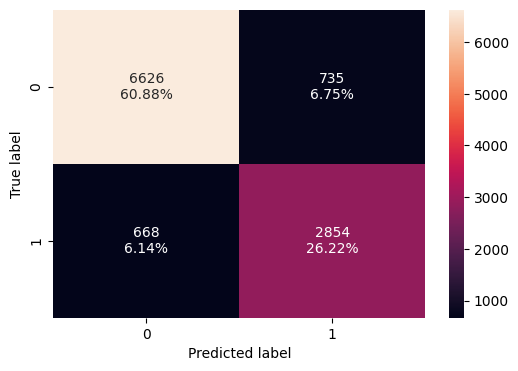

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.87108 0.81034    0.79521 0.80270

- There is a huge disparity in performance of model on training set and test set, which suggests the model is overfiiting.
- With this disparity we will try different prunning techniques to reduce overfitting

#### Important Features of the Decision Tree

In [ ]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


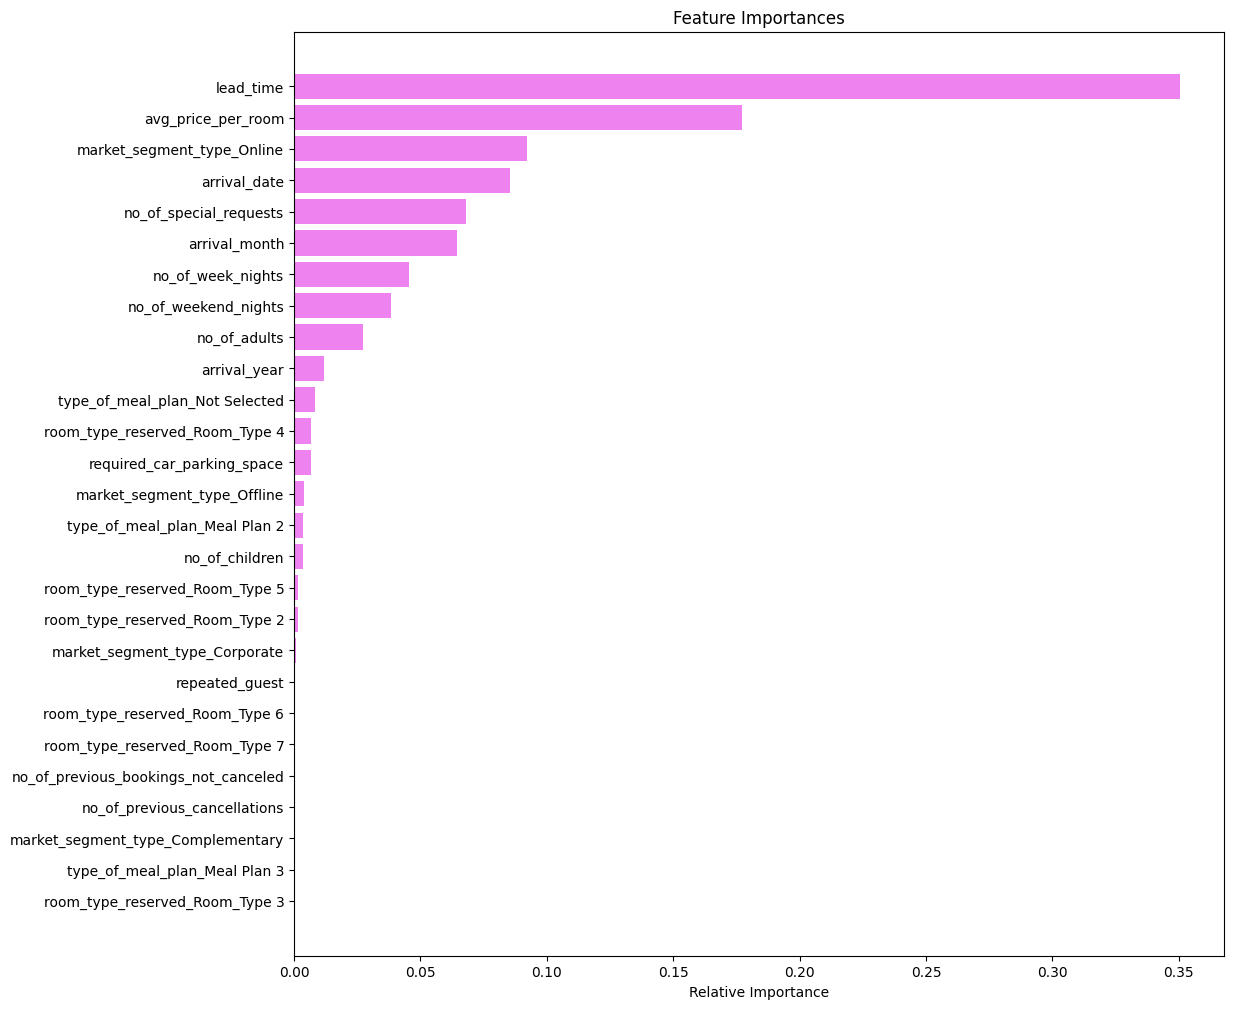

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Lead Time, Average Price Per Room, and Market Segment Type-Online are the top 3 important features in that order

## Pruning Decision Tree

###Pre-Prunning of Decison Tree

**Using GridSearch for Hyperparameter tuning of our tree model**

- Let's see if we can improve our model performance

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 18, 2),
    "max_leaf_nodes": [25, 50, 75, 150],
    "min_samples_split": [5, 10, 30, 50],

}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=25,
                       min_samples_split=5, random_state=1)

#### Checking performance on training set

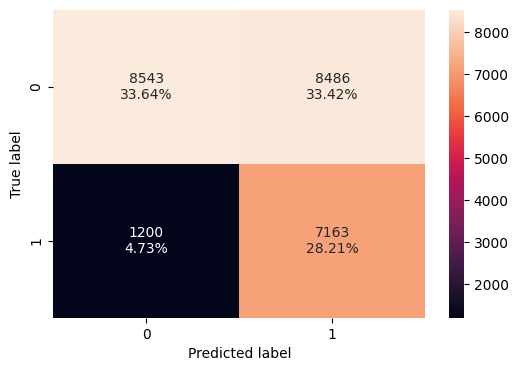

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.61854 0.85651    0.45773 0.59662

#### Checking model performance on test set

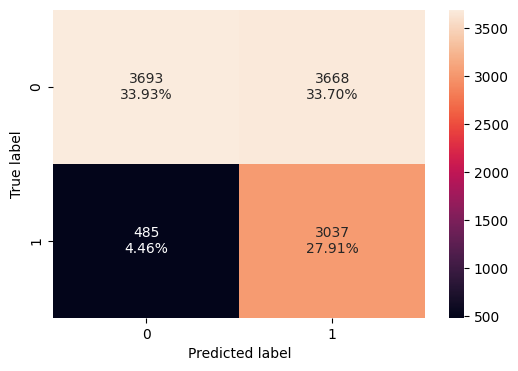

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.61840 0.86229    0.45295 0.59392

- The model is giving a generalized result now since F1 scores on both the training and test data are coming to be approx. 0.59.  The other metrics are also similar between training and test data sets, so we can see it is not overfitting

####Visualization and Important Features

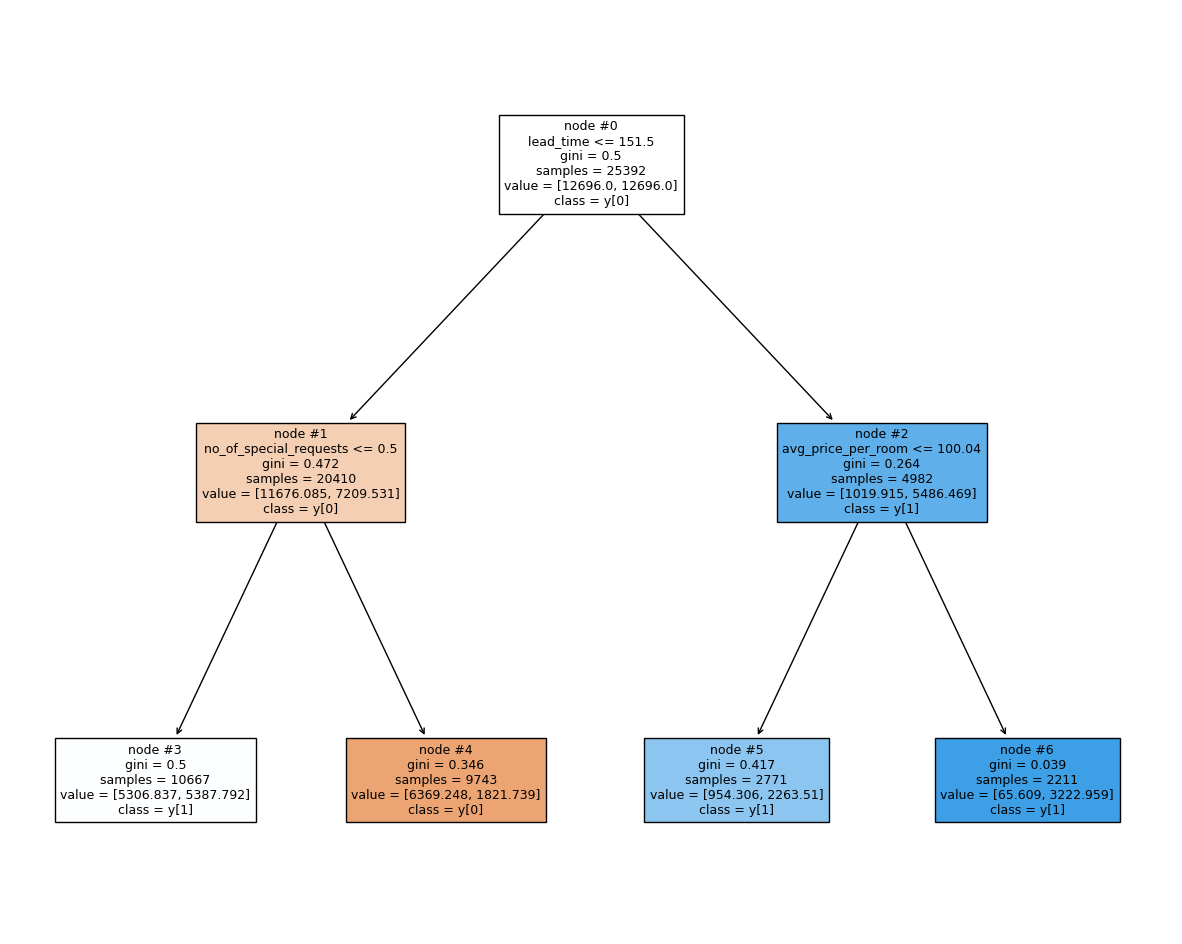

In [ ]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- weights: [5306.84, 5387.79] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [6369.25, 1821.74] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- weights: [954.31, 2263.51] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- weights: [65.61, 3222.96] class: 1



- This tree is much simplier after pre-prunning.  

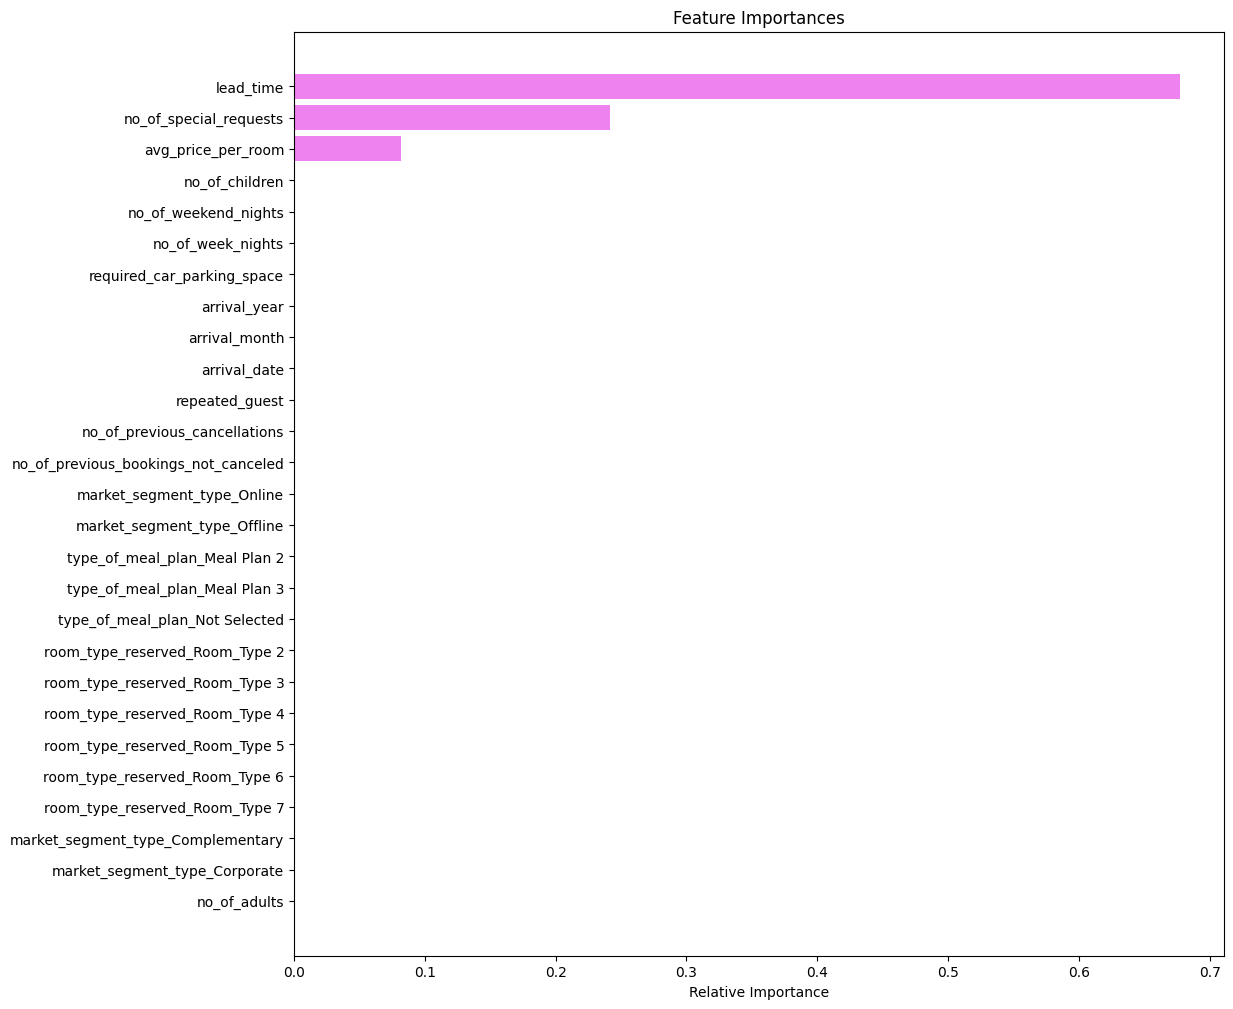

In [ ]:
# Important Features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The important features in the pre-prunning model are: Lead Time, Number of Special Requests, and Average Price Per Room
- Lead Time is still the top feature, and Average Price Per Room is still in the top 3

###Post-Prunning of Decison Tree

**Cost Complexity Pruning** is another option to control the size of a tree. Using DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha.

Using DecisionTreeClassifier.cost_complexity_pruning_path we will get effective alphas and it's correesponding leaf impurities at each prunning step.




In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00838
1        0.00000     0.00838
2        0.00000     0.00838
3        0.00000     0.00838
4        0.00000     0.00838
...          ...         ...
1837     0.00890     0.32806
1838     0.00980     0.33786
1839     0.01272     0.35058
1840     0.03412     0.41882
1841     0.08118     0.50000

[1842 rows x 2 columns]

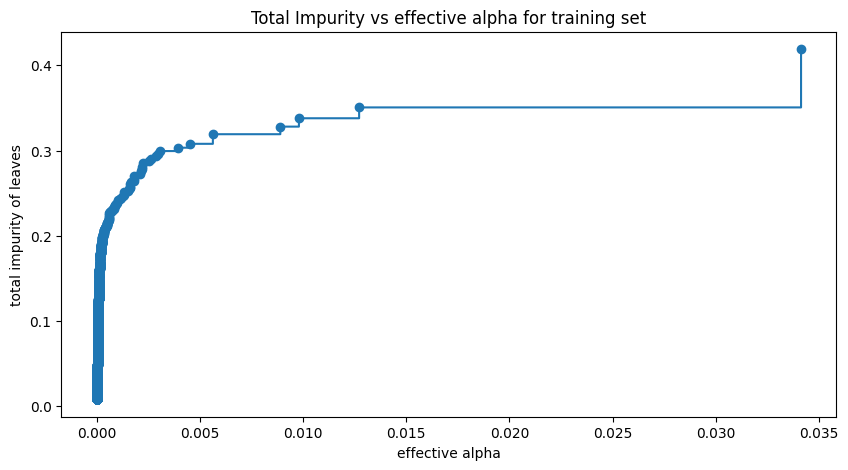

In [ ]:
# Visualizing Effective alpha for training set vs Total Impurity
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136949


For the remainder, we remove the last element in clfs and ccp_alphas, because it is just a singular node. In the following plots, show the number of nodes and tree depth decrease as alpha increases.

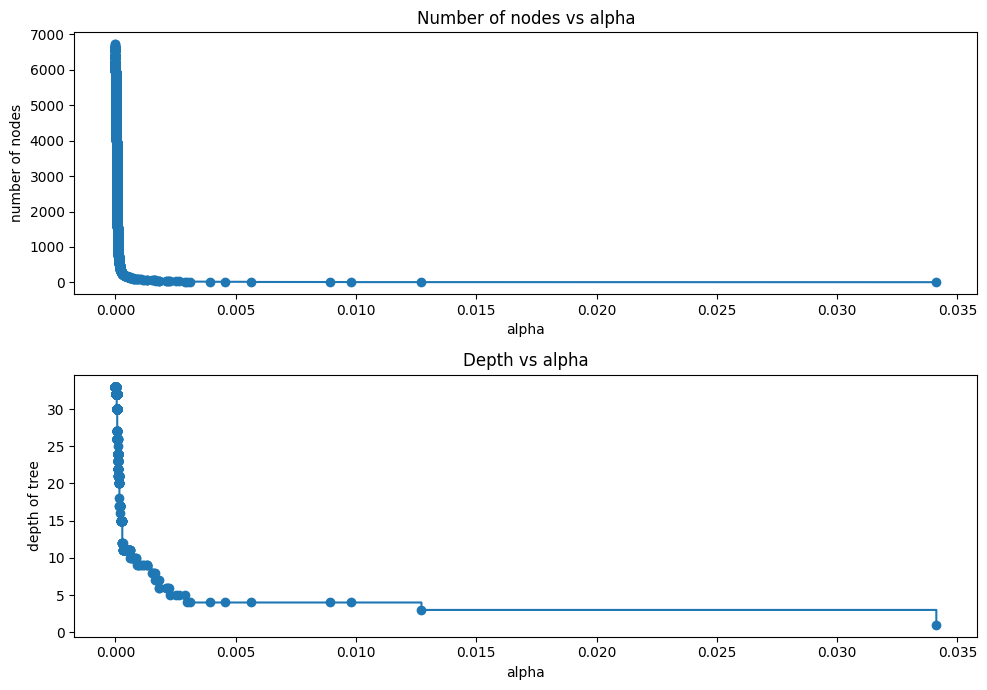

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### F1 Score vs alpha for training and testing sets

In [ ]:
# Creating values for training data
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

In [ ]:
# Creating values for testing data
f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

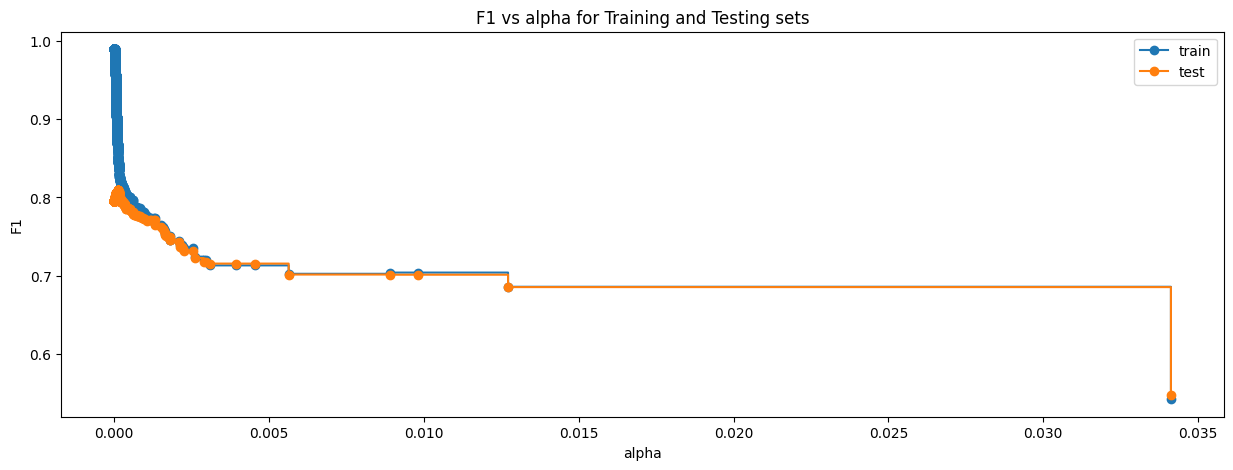

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1")
ax.set_title("F1 vs alpha for Training and Testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# Creating the model to get highest train and test F1
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167034,
                       class_weight='balanced', random_state=1)


In [ ]:
# Index number for best model for f1 and alpha
np.argmax(f1_test)

1604

#### Checking model performance on training set

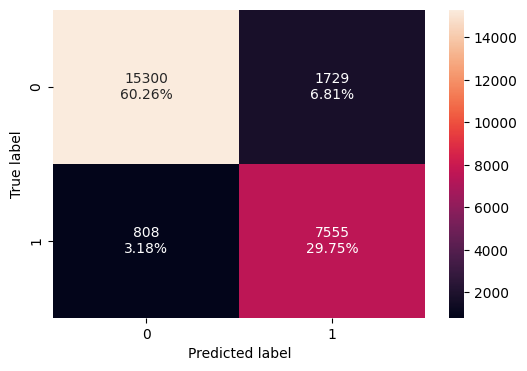

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

Accuracy  Recall  Precision      F1
0   0.90009 0.90338    0.81377 0.85624

#### Checking model performance on test set

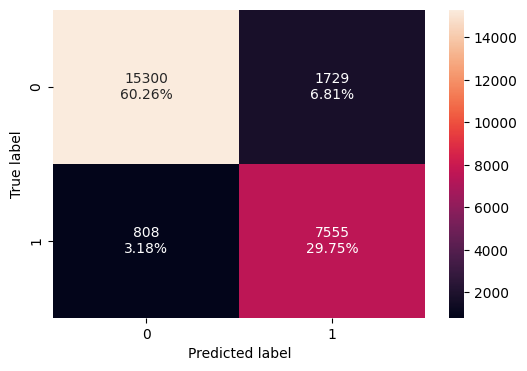

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

Accuracy  Recall  Precision      F1
0   0.86934 0.85662    0.76690 0.80928

- Post-Pruning we are getting a good model that is performing well on both training and testing sets
- The model is slightly overfitting the data, since the performance on test set is 3-5% below the training set
- The F1 score has improved even more

#### Visualization and Important Features

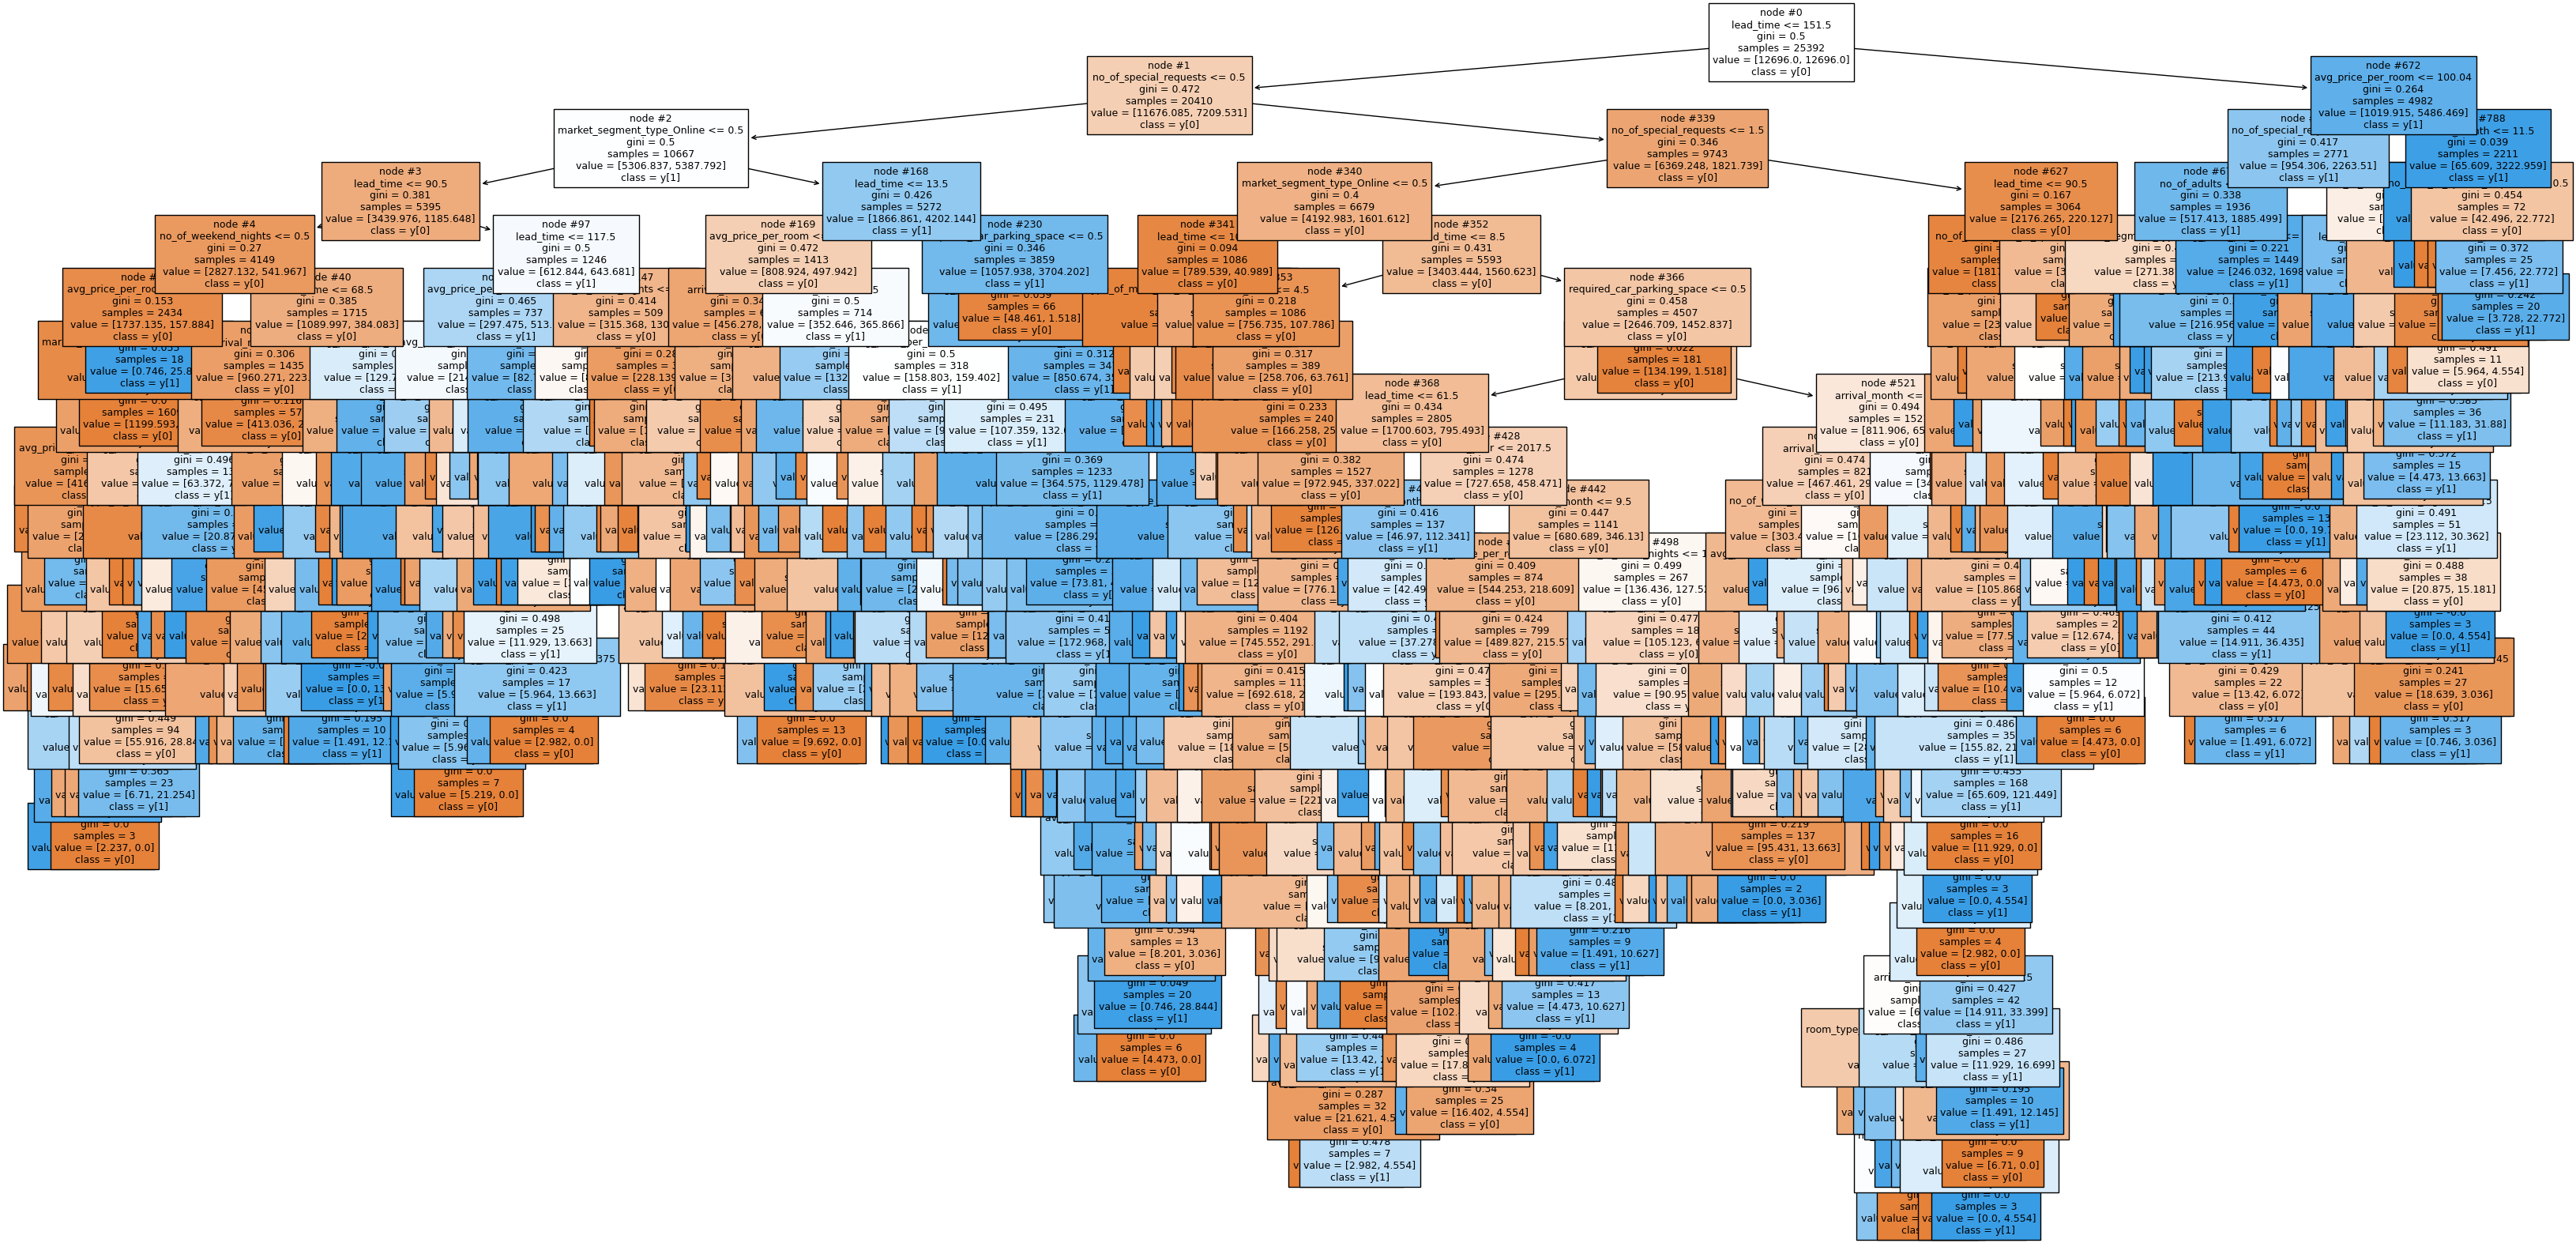

In [ ]:
plt.figure(figsize=(40, 20))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

- This model is simplier than the original, but is still a very complex decision tree

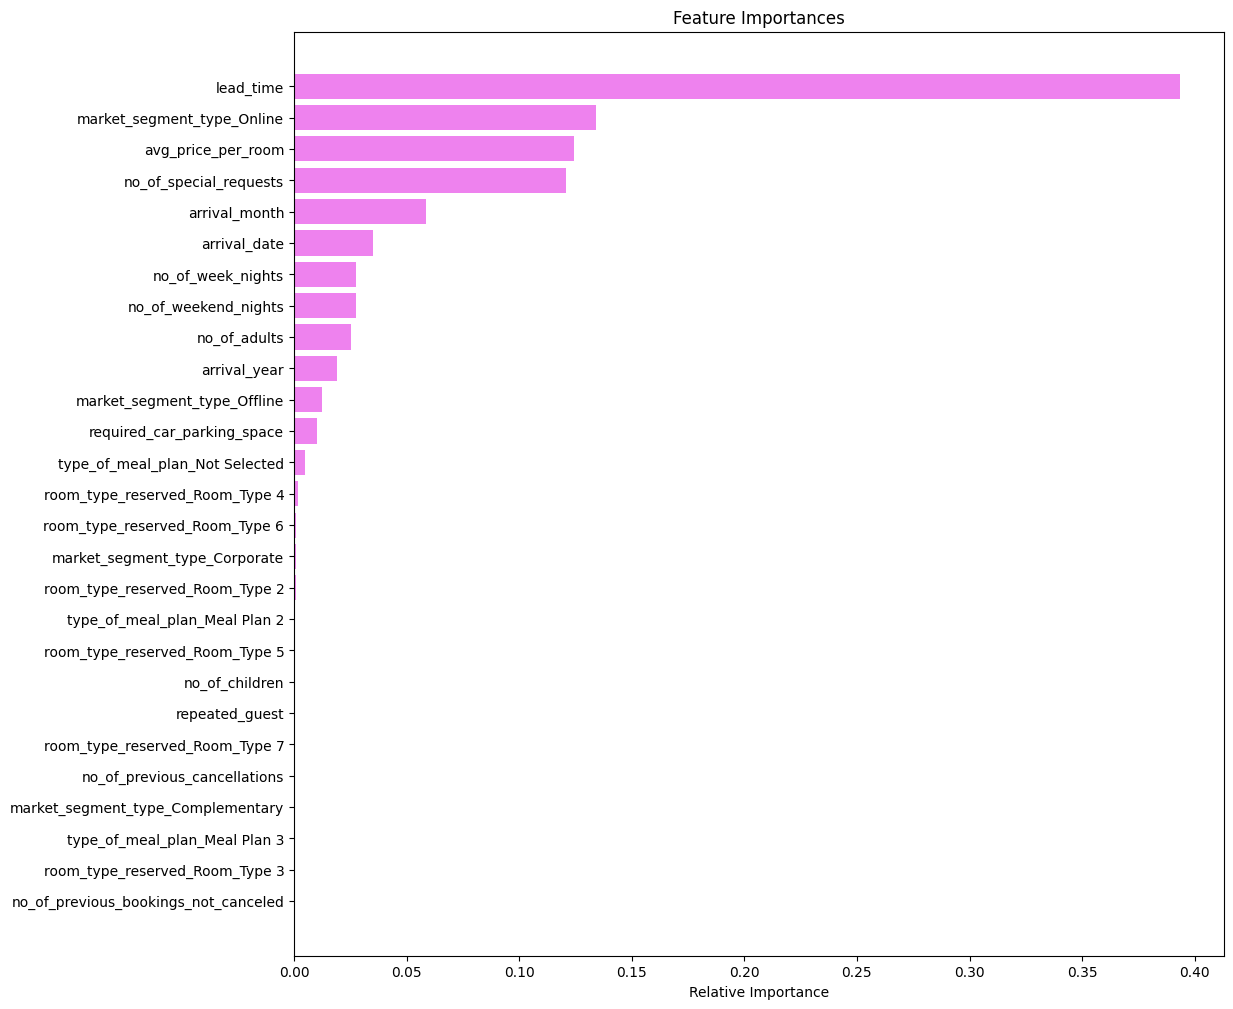

                                         Imp
lead_time                            0.39333
market_segment_type_Online           0.13424
avg_price_per_room                   0.12431
no_of_special_requests               0.12072
arrival_month                        0.05847
arrival_date                         0.03529
no_of_week_nights                    0.02773
no_of_weekend_nights                 0.02739
no_of_adults                         0.02546
arrival_year                         0.01892
market_segment_type_Offline          0.01238
required_car_parking_space           0.01006
type_of_meal_plan_Not Selected       0.00508
room_type_reserved_Room_Type 4       0.00190
room_type_reserved_Room_Type 6       0.00096
market_segment_type_Corporate        0.00082
room_type_reserved_Room_Type 2       0.00081
type_of_meal_plan_Meal Plan 2        0.00066
room_type_reserved_Room_Type 5       0.00058
no_of_children                       0.00056
repeated_guest                       0.00034
no_of_prev

In [ ]:
# Important features in the tree building

importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

- Lead Time is still the most important feature
- The next three important features after Lead Time are: Market Segment Type-Online, Number of Special Requests, and Average Price Per Room

**Observations**
- This model does give a high F1 score (~80)
- Appears to be overfitting a little
  - Complicated decision tree (it is less than the full decision tree, but still maybe overwhelming)
- Important Features:
  1.   Lead Time
  2.   Online-Market Segment
  3.   Average Price Per Room
  4.   Number of Special Requests

I will try more post-pruning models with larger alpha values to minimize overfitting and also to make the decision tree easier to follow

### More Post Prunning
- Making a decision tree with less brances, high F1 score, and not overfitting using different index values

In [ ]:
# Creating the model

index_model_1820 = clfs[1820]
print(index_model_1820)

DecisionTreeClassifier(ccp_alpha=0.0016749562879537043, class_weight='balanced',
                       random_state=1)


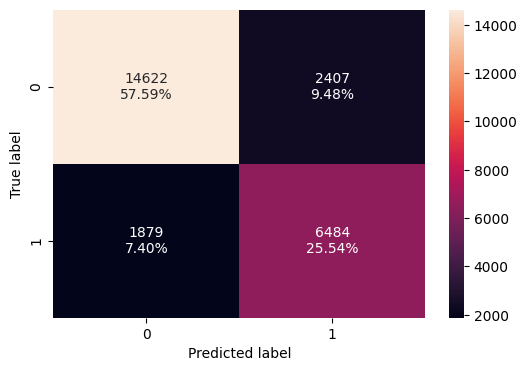

In [ ]:
confusion_matrix_sklearn(index_model_1820, X_train, y_train)

In [ ]:
decision_tree_postpruned_perf_train_1820 = model_performance_classification_sklearn(
    index_model_1820, X_train, y_train
)
decision_tree_postpruned_perf_train_1820

Accuracy  Recall  Precision      F1
0   0.83121 0.77532    0.72928 0.75159

#### Checking model performance on test set

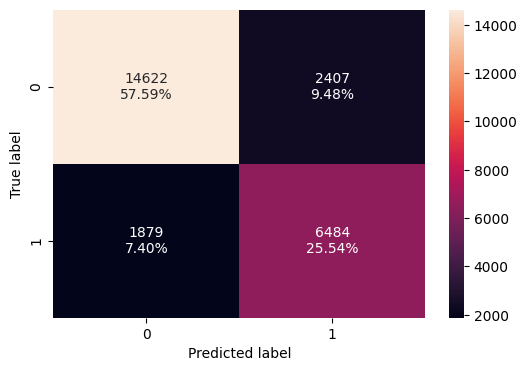

In [ ]:
confusion_matrix_sklearn(index_model_1820, X_train, y_train)

In [ ]:
decision_tree_postpruned_perf_test_1820 = model_performance_classification_sklearn(
    index_model_1820, X_test, y_test
)
decision_tree_postpruned_perf_test_1820

Accuracy  Recall  Precision      F1
0   0.83405 0.77229    0.73040 0.75076

- Post-Pruning we are getting a good model that is performing well on both training and testing sets
- The model not overfitting, since the performance metrics are very similar on train and test sets
- The F1 score is ~75

#### Visualization and Important Features

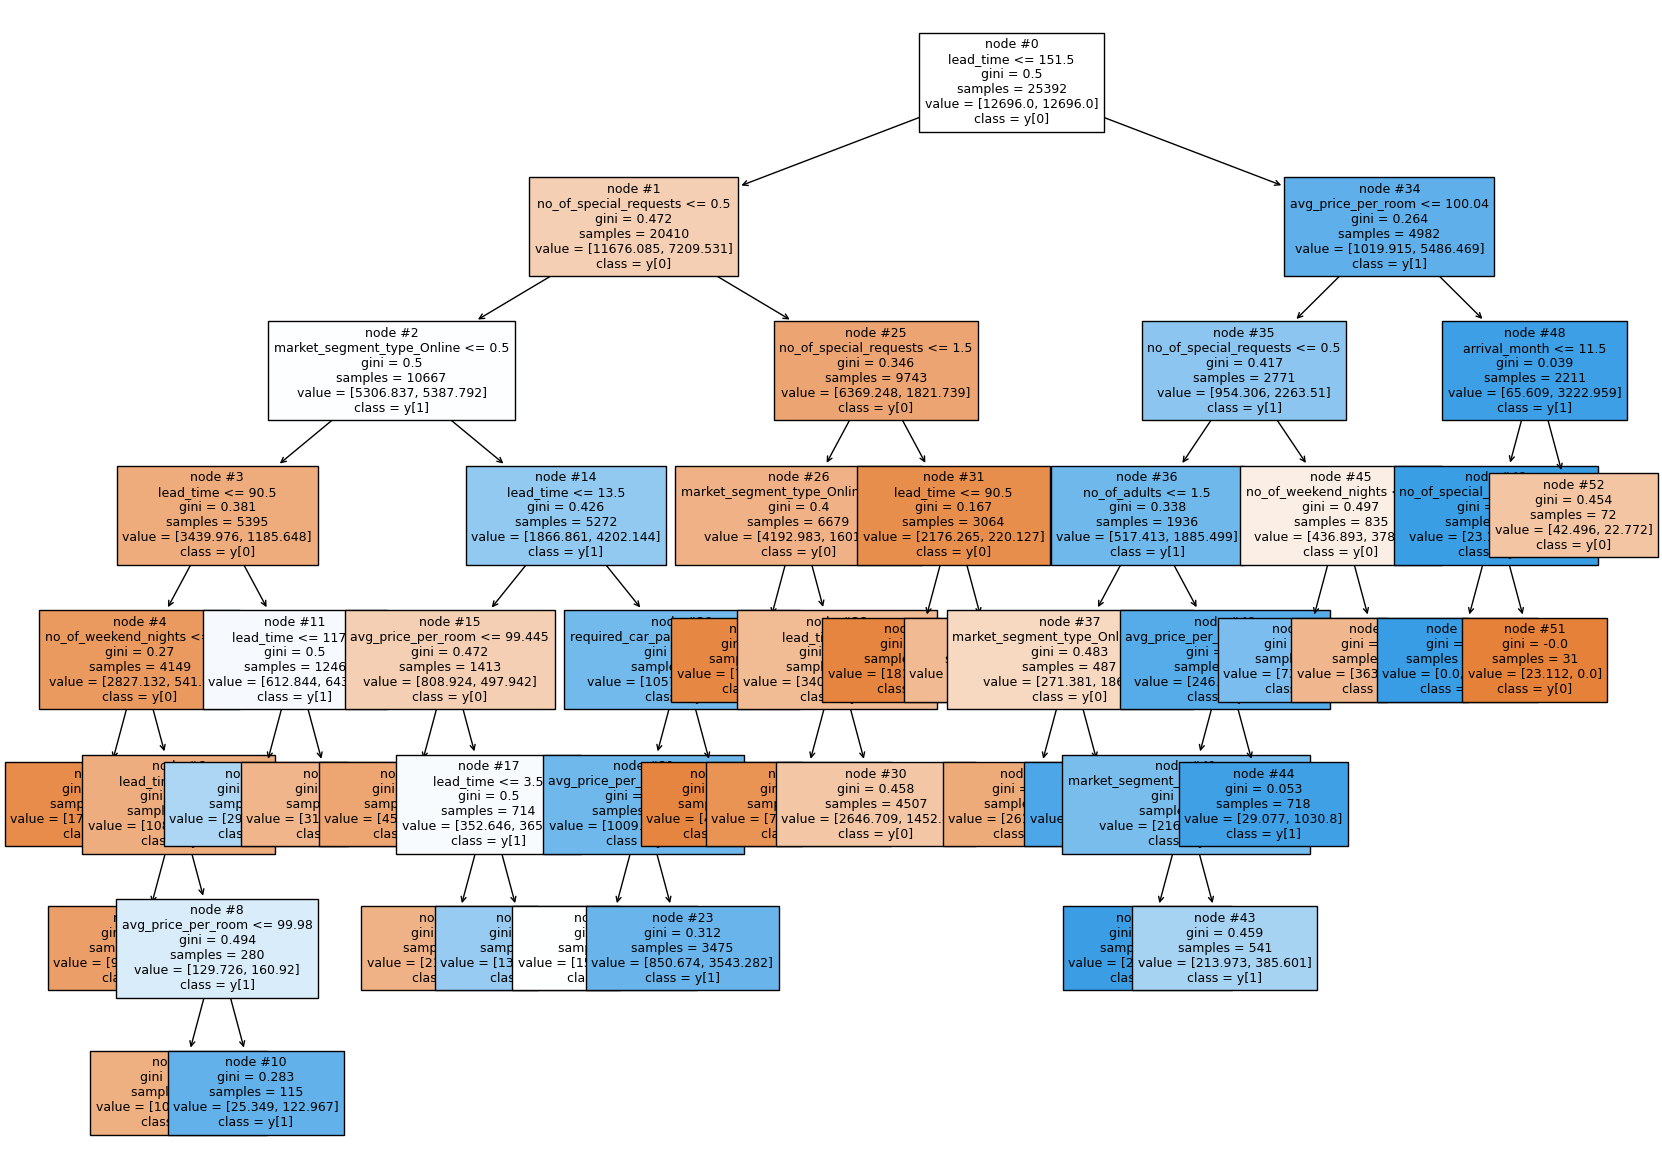

In [ ]:
plt.figure(figsize=(20, 15))

out = tree.plot_tree(
    index_model_1820,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(index_model_1820, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- weights: [1737.14, 157.88] class: 0
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- avg_price_per_room <= 99.98
|   |   |   |   |   |   |   |--- weights: [104.38, 37.95] class: 0
|   |   |   |   |   |   |--- avg_price_per_room >  99.98
|   |   |   |   |   |   |   |--- weights: [25.35, 122.97] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- weights: [297.48, 513.12] class: 1
|   |   |   |   |--- lead_time >  117.50
|   |   |   |   |   |--- weights: [315.37, 130.56] class: 0
|   |   |--- market_segment_type_Online >  0.50
|   

- This model is much simplier than the best_model, but still has several splits to evaluate to make a decision

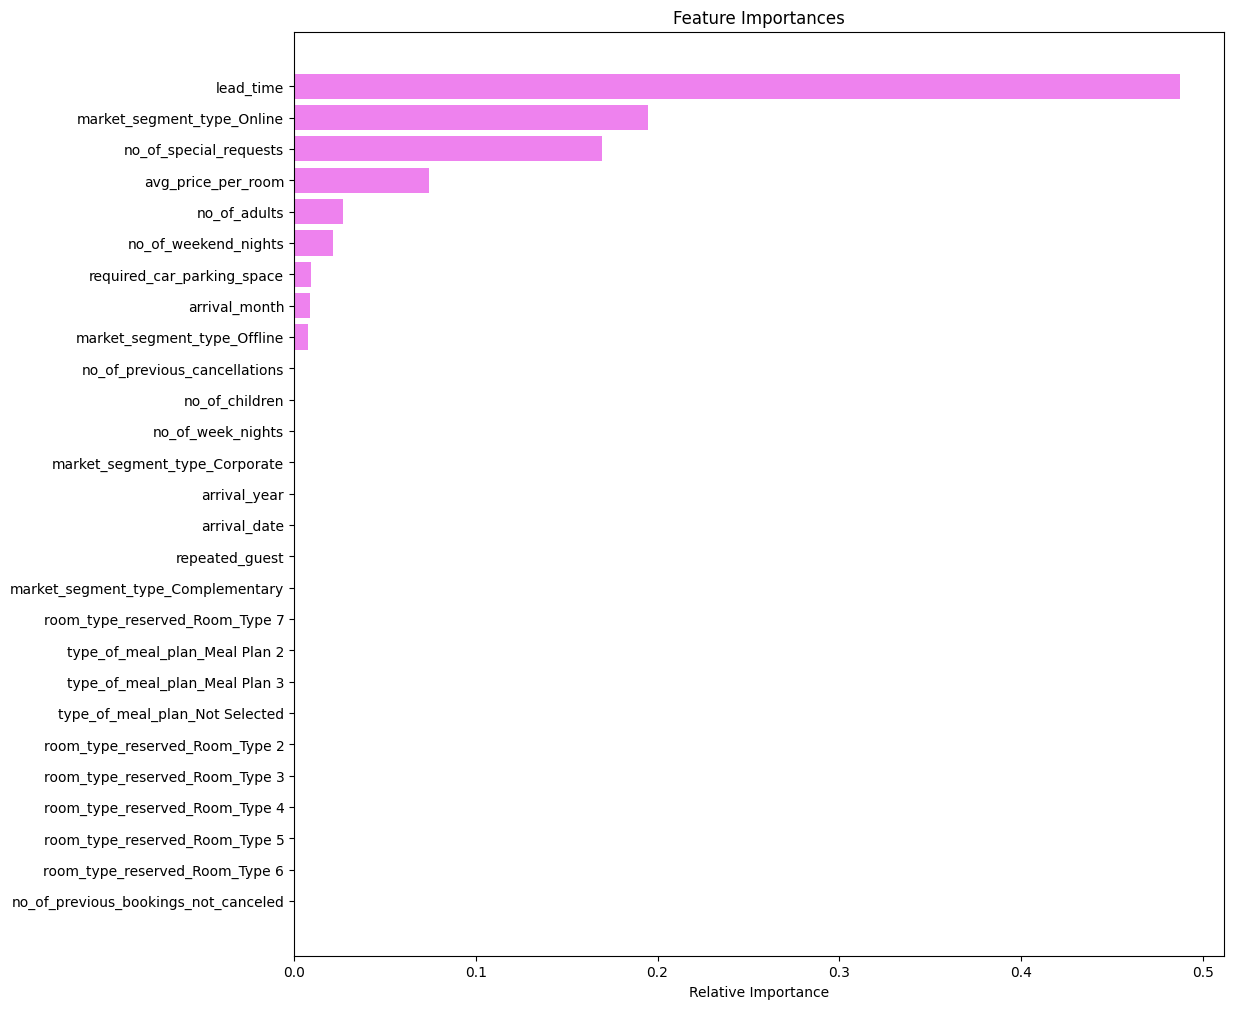

                                         Imp
lead_time                            0.48724
market_segment_type_Online           0.19452
no_of_special_requests               0.16951
avg_price_per_room                   0.07444
no_of_adults                         0.02672
no_of_weekend_nights                 0.02170
required_car_parking_space           0.00937
arrival_month                        0.00881
market_segment_type_Offline          0.00770
room_type_reserved_Room_Type 2       0.00000
market_segment_type_Corporate        0.00000
market_segment_type_Complementary    0.00000
room_type_reserved_Room_Type 7       0.00000
room_type_reserved_Room_Type 6       0.00000
room_type_reserved_Room_Type 5       0.00000
room_type_reserved_Room_Type 4       0.00000
room_type_reserved_Room_Type 3       0.00000
no_of_week_nights                    0.00000
type_of_meal_plan_Not Selected       0.00000
type_of_meal_plan_Meal Plan 2        0.00000
no_of_children                       0.00000
no_of_prev

In [ ]:
# Important features in the tree building

importances = index_model_1820.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

print(
    pd.DataFrame(
        index_model_1820.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

- Lead Time is still the most important feature followed by Market Segment Type-Online, and Number of Special Requests.

**Observations**
- This model does give a high F1 score (~75)
- There doesn't seem to be overfitting
  - Decision tree is much less complicated
- Important Features:
  1.   Lead Time
  2.   Online-Market Segment
  3.   Average Price Per Room
  4.   Number of Special Requests (is half the importance as #3, Avg Price per Room)

I will try more post-pruning models with larger alpha values to minimize the complexity of the decision tree, while still trying to maintain a high F1 score

### More Post Prunning
- Making a decision tree with even less branches and a high F1 score using different index values



In [ ]:
# Creating a model using index 1838

index_model_1838 = clfs[1838]
print(index_model_1838)

DecisionTreeClassifier(ccp_alpha=0.009802242822022168, class_weight='balanced',
                       random_state=1)


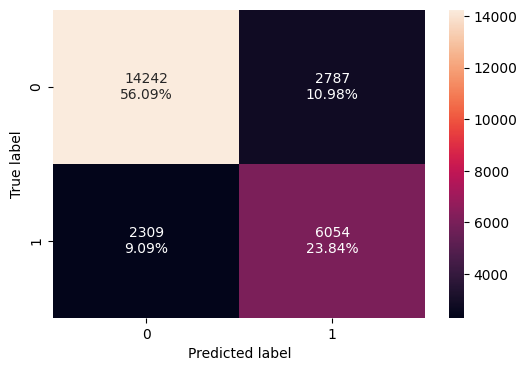

In [ ]:
confusion_matrix_sklearn(index_model_1838, X_train, y_train)

In [ ]:
decision_tree_postpruned_perf_train_1838 = model_performance_classification_sklearn(
    index_model_1838, X_train, y_train
)
decision_tree_postpruned_perf_train_1838

Accuracy  Recall  Precision      F1
0   0.79931 0.72390    0.68476 0.70379

#### Checking model performance on test set

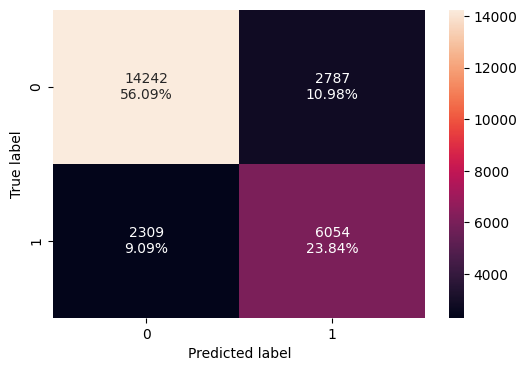

In [ ]:
confusion_matrix_sklearn(index_model_1838, X_train, y_train)

In [ ]:
decision_tree_postpruned_perf_test_1838 = model_performance_classification_sklearn(
    index_model_1838, X_test, y_test
)
decision_tree_postpruned_perf_test_1838

Accuracy  Recall  Precision      F1
0   0.80024 0.72374    0.67973 0.70105

- Post-Pruning we are getting a good model that is performing well on both training and testing sets
- The model is not overfitting since all performances measures very close
- The F1 score is ~70%

#### Visualization and Important Features

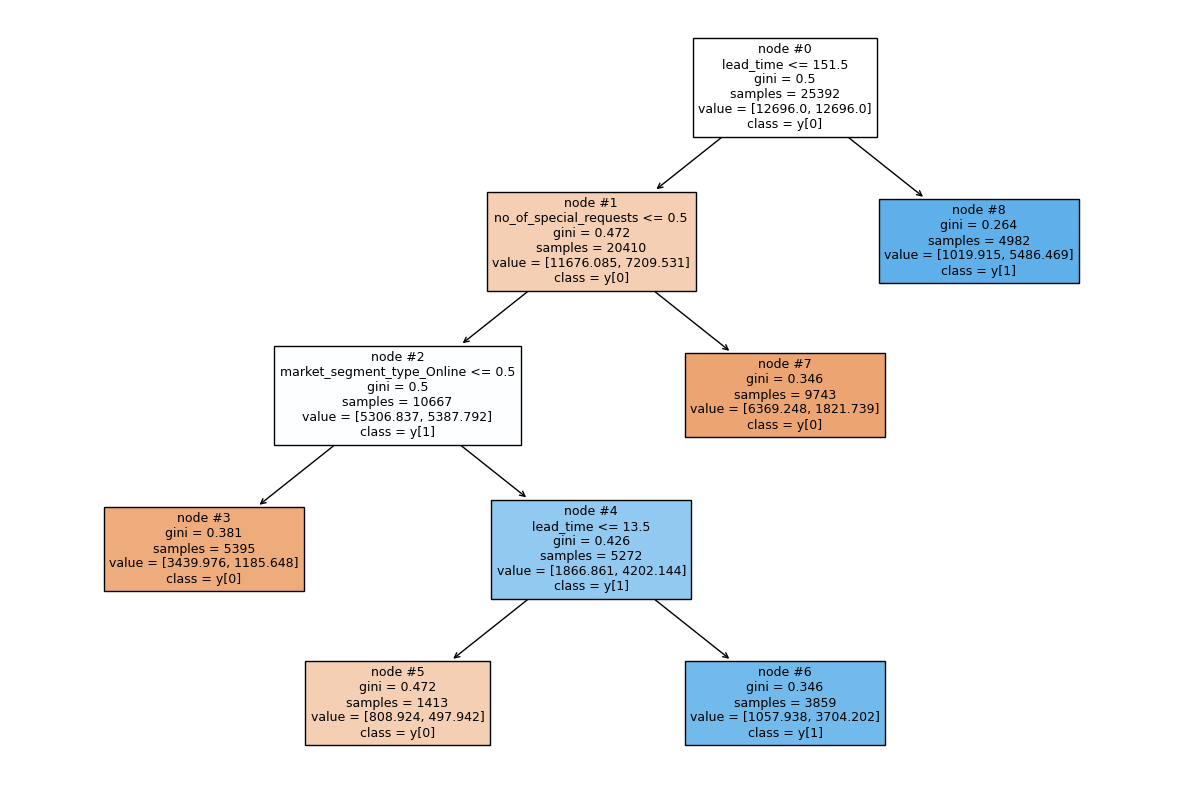

In [ ]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    index_model_1838,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(index_model_1838, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [3439.98, 1185.65] class: 0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- lead_time <= 13.50
|   |   |   |   |--- weights: [808.92, 497.94] class: 0
|   |   |   |--- lead_time >  13.50
|   |   |   |   |--- weights: [1057.94, 3704.20] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [6369.25, 1821.74] class: 0
|--- lead_time >  151.50
|   |--- weights: [1019.91, 5486.47] class: 1



- This model is simple and easy to follow.


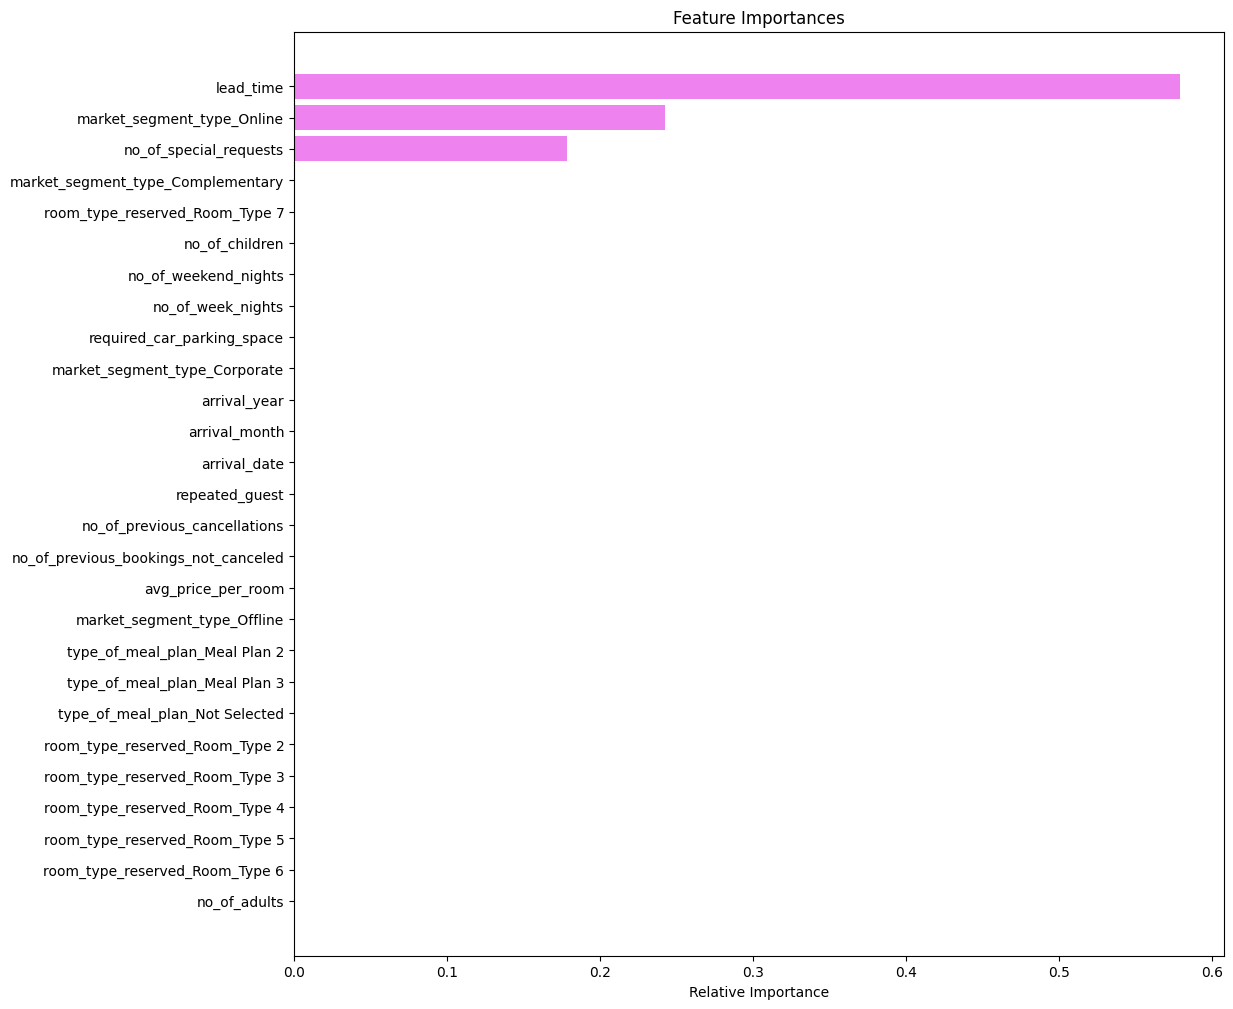

                                         Imp
lead_time                            0.57912
market_segment_type_Online           0.24248
no_of_special_requests               0.17840
no_of_week_nights                    0.00000
required_car_parking_space           0.00000
market_segment_type_Offline          0.00000
market_segment_type_Corporate        0.00000
market_segment_type_Complementary    0.00000
room_type_reserved_Room_Type 7       0.00000
room_type_reserved_Room_Type 6       0.00000
room_type_reserved_Room_Type 5       0.00000
room_type_reserved_Room_Type 4       0.00000
room_type_reserved_Room_Type 3       0.00000
room_type_reserved_Room_Type 2       0.00000
type_of_meal_plan_Not Selected       0.00000
type_of_meal_plan_Meal Plan 3        0.00000
type_of_meal_plan_Meal Plan 2        0.00000
no_of_children                       0.00000
avg_price_per_room                   0.00000
no_of_previous_bookings_not_canceled 0.00000
no_of_previous_cancellations         0.00000
repeated_g

In [ ]:
# Important features in the tree building

importances = index_model_1838.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

print(
    pd.DataFrame(
        index_model_1838.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

- Lead Time is still the most important feature followed by Market Segment Type-Online and Number of Special Requests.

**Observations**
- This model does give a high F1 score (~70)
- Overfitting is not present
- Decision tree is very easy to follow
- Important Features:
  1.   Lead Time
  2.   Online-Market Segment
  3.   Average Price Per Room
  - This is the index value where Average Price per Room doesn't have any importance in the decision tree model.

#### Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
        decision_tree_postpruned_perf_train_1820.T,
        decision_tree_postpruned_perf_train_1838.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
    "Decision Tree (Post-Pruning_1820)",
    "Decision Tree (Post-Pruning_1838)"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.99421                      0.61854   
Recall                   0.98661                      0.85651   
Precision                0.99578                      0.45773   
F1                       0.99117                      0.59662   

           Decision Tree (Post-Pruning)  Decision Tree (Post-Pruning_1820)  \
Accuracy                        0.90009                            0.83121   
Recall                          0.90338                            0.77532   
Precision                       0.81377                            0.72928   
F1                              0.85624                            0.75159   

           Decision Tree (Post-Pruning_1838)  
Accuracy                             0.79931  
Recall                               0.72390  
Precision                            0.68476  
F1                                   0.70379

In [ ]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
        decision_tree_postpruned_perf_test_1820.T,
        decision_tree_postpruned_perf_test_1838.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
    "Decision Tree (Post-Pruning_1820)",
    "Decision Tree (Post-Pruning_1838)"
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.87108                      0.61840   
Recall                   0.81034                      0.86229   
Precision                0.79521                      0.45295   
F1                       0.80270                      0.59392   

           Decision Tree (Post-Pruning)  Decision Tree (Post-Pruning_1820)  \
Accuracy                        0.86934                            0.83405   
Recall                          0.85662                            0.77229   
Precision                       0.76690                            0.73040   
F1                              0.80928                            0.75076   

           Decision Tree (Post-Pruning_1838)  
Accuracy                             0.80024  
Recall                               0.72374  
Precision                            0.67973  
F1                                   0.70105

**Overall Observations**
- **Pre-Pruning** has a simple model, gives a decent F1 score (~60). It doesn't give a good Precision score which is far less than other models, which would not be good for the hotel's image. It did use lead time as its most important feature followed by number of special requests, average price per room.  

- **Post-Pruning** gives us the best performance models
  - Lead Time, Market Segment Type Online were the top two important features on all of these.  Average Price per Room was number three for the best_model, but Number of Special Requests was fourth and was third on the other models.
  - *Post-Pruning with best_model* to get highest train and F1 (index 1604) gives us the best F1 score (~80), but is overfitting; so am weary to use this model. It also had a very complex decision tree.
  - *Post-Pruning with index 1820* gave a good F1 score of ~75, and did not show signs of overfitting. The decision tree was simplier than the best_model
  - *Post-Pruning with index 1838* gave a good F1 score of ~70, and did not show signs of overfitting. The decision tree was almost as simple as the pre-prunning except gives better results, and only used three features to create it.



**I would choose Post-Prunning_1838 Model to make a decision if a guest will
cancel or show up for their booking** because it did not overfit, gives high performance metrics on all, and only uses three features to make a decision which would make it easy on the hotel to make a quick decision. If they have the time and want to analyze they could use Post-Pruning_1820 Model, but it takes into account several more features, and only gives a little better prediction than Post-Prunning_1838 Model.

## Actionable Insights and Recommendations

In [ ]:
# Test performance comparison on Top Logistic Regression Model and Top Decision Tree Model

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf_threshold_auc_roc.T,
        decision_tree_postpruned_perf_test_1838.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-0.37 Threshold",
    "Decision Tree (Post-Pruning_1838)"
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


Logistic Regression-0.37 Threshold  \
Accuracy                              0.79289   
Recall                                0.73562   
Precision                             0.66870   
F1                                    0.70056   

           Decision Tree (Post-Pruning_1838)  
Accuracy                             0.80024  
Recall                               0.72374  
Precision                            0.67973  
F1                                   0.70105

- Both of these models perform well with an F1 score of approximately 70 and did well on not overfitting to the data.  
- **I would suggest using the Decision Tree Post-Prunning_1838 Model** because it gives good results and keeps the process simple with only using three features, compared to the logistic regression model which uses several features. As a manager it would be easy to explain to your employees what to look for in cancellation status to be better prepared.  If using the Logistic model you would have to enter in all the data to make a decision, and in the world that is moving rapidly you need something that will give you an answer quickly.  This is exactly what the Decision Tree Post-Pruning_1838 Model does.


---



- `*Criteria to decide if a booking will cancel or not*` according to the decison tree is model should depend on three main factors - Lead Time, Market Segment Type Online, and Number of Special Requests.

  - Example: Lead Time is greater than 151.5 days they will most likely cancel.

  - Example: Lead Time is less than 151.5 days, then Special Requests are greater than .5 (means they actually made a special request) they will most likely show for their booking.

  - Example: Lead Time is less than 151.5 days, then Special Requests is less than .5 (means they didn't make any specal requests), and then Market Segment Type was not Online they will most likely cancel their booking.

- `*Lead Time*` is by far the most important feature for the decision tree in determining cancellation status.

- `*Special Requests*` has a big impact on cancellation, none of the bookings canceled if they made 3 or more special requests. Also according to the regression model the more requests the less likely they will cancel.

- `*Requiring a Parking Space*` and if you are a *Repeated Guests* decrease the likely hood a guest will cancel.

- Bookings for 3 nights or less is ~70% of bookings and Lead Time of less than 60 days is ~51%, and less than 30 days is ~33%

**Policy Recommendations:**
  - When `Booking` you must make a deposit determined by how many nights booking
      - Book for 3 nights or less, deposit is one nights stay.
      - Book for greater than 3 nights, deposit is half the number of nights booked.
  - `Cancellation Policy`
    - If cancelling a booking 60 days prior to arrival day you shall recieve a full refund on your deposit.
    - If cancelling a booking 30 days prior to arrival day you shall recieve a half of your deposit.
    - If cancelling within 30 days to arrival day you shall not recieve any of your deposit.

This will lower the impact of guests that book way in advance and then cancel, and if they cancel within 30 days then at least the hotel will make some money and may still have time to have another guest book.  
  - *Notice within 30 days about 33% of guest book and this is the same percent of cancellation status at this time.  *

- Recommendation for `Repeated Guests`: If you are a repeated guest you will get 10% off your booking.  This would help the hotel's cancellation numbers decrease since repeated guests don't cancel, and it will start to build brand loyalty to the hotel.
- Recommendation for `Meal Plans`: Eliminate Meal plan 3 since it is ordered approx. .01% of the time.  Having cooks stay for the diner meal is not worth the hotel's cost, and are losing money on this plan.   